In [1]:
from os import sys
sys.path.append("../../meshAfterParty/")

In [2]:
import skeleton_utils as sk
import soma_extraction_utils as sm
import trimesh_utils as tu
import trimesh
import numpy_utils as nu
import numpy as np
from importlib import reload
import networkx as nx
import time
import compartment_utils as cu
import networkx_utils as xu
import matplotlib_utils as mu

sm = reload(sm)

In [182]:
#Setting where base neuron is
segment_id = 12345
current_mesh_file = "/notebooks/neuron_mesh_tools/test_neurons/multi_soma_example.off"


# **** Phase 1 ****

# Starting from the very beginning of a neuron mesh

In [183]:
current_neuron = trimesh.load_mesh(current_mesh_file)

In [184]:
sk.graph_skeleton_and_mesh(main_mesh_verts=current_neuron.vertices,
                          main_mesh_faces=current_neuron.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

# Doing the soma detection

In [5]:
soma_mesh_list,run_time,total_soma_list_sdf = sm.extract_soma_center(segment_id,
                                             current_neuron.vertices,
                                             current_neuron.faces)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 15000.0 
large_mesh_threshold_inner = 10000.0 
soma_size_threshold = 1250.0 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 3624
xvfb-run -n 3624 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/decimation_meshlab_25703486.mls
Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(139795, 3), faces.shape=(284334, 3))>]
----- working on large mesh #0: <trimesh.Trimesh(vertices.shape=(139795, 3), faces.shape=(284334, 3))>
pre_largest_mesh_path = /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

Total found significant pieces AFTER Poisson = [<trimesh.Trimesh(vertices.shape=(151132, 3), faces.shape=(302272, 3))>, <trimesh.Trimesh(vertices.shape=(42551, 3), faces.shape=(85098, 3))>]
----- working on mesh after poisson #0: <trimesh.Trimesh(vertices.shape=(151132, 3), faces.shape=(302272, 3))>
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 9621
xvfb-run -n 9621 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/decimation_meshlab_25509781.mls
done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off
1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: M

face_normals all zero, ignoring!
face_normals all zero, ignoring!


removed temporary input file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_552037.off
removed temporary output file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_552037_poisson.off
/notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/poisson_608195.mls is being deleted....
Inside sphere validater: ratio_val = 2.882922788675577
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(42551, 3), faces.shape=(85098, 3))>
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 8501
xvfb-run -n 8501 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/12345/decimation_mesh

face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


removed temporary input file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_940379.off
removed temporary output file: /notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/neuron_940379_poisson.off
/notebooks/neuron_mesh_tools/meshAfterParty/development/Poisson_temp/poisson_607770.mls is being deleted....
Inside sphere validater: ratio_val = 3.0502651518210446



 Total time for run = 117.18456435203552


# At this point assume that there are somas (if not would just skip to the limb skeleton stuff)

In [6]:
# Visualizing the somas: 
total_soma = tu.combine_meshes(soma_mesh_list)
soma_meshes = total_soma
sk.graph_skeleton_and_mesh(main_mesh_verts=soma_meshes.vertices,
                          main_mesh_faces=soma_meshes.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

In [7]:
# geting the soma centers
if len(soma_mesh_list) <= 0:
    print(f"**** No Somas Found for Mesh {segment_id} so just one mesh")
    soma_mesh_list_centers = []
else:
    #compute the soma centers
    print(f"Soma List = {soma_mesh_list}")

    soma_mesh_list_centers = sm.find_soma_centroids(soma_mesh_list)
    print(f"soma_mesh_list_centers = {soma_mesh_list_centers}")

Soma List = [<trimesh.Trimesh(vertices.shape=(3177, 3), faces.shape=(6235, 3))>, <trimesh.Trimesh(vertices.shape=(2138, 3), faces.shape=(4236, 3))>]
soma_mesh_list_centers = [array([756915.02275732, 958987.26197671, 874182.12348127]), array([864025.20827876, 994593.71529467, 859608.41014967])]


# getting the soma submeshes that are connected to each soma and identifiying those that aren't (and eliminating any mesh pieces inside the soma)

In [8]:
main_mesh_total = current_neuron
sig_th_initial_split=15

#finding the mesh pieces that contain the soma
#splitting the current neuron into distinct pieces
split_meshes = tu.split_significant_pieces(
                            main_mesh_total,
                            significance_threshold=sig_th_initial_split,
                            print_flag=False)

print(f"# total split meshes = {len(split_meshes)}")


#returns the index of the split_meshes index that contains each soma    
containing_mesh_indices = sm.find_soma_centroid_containing_meshes(soma_mesh_list_centers,
                                        split_meshes)

containing_mesh_indices

# total split meshes = 79


{0: 0, 1: 0}

In [9]:
# filtering away any of the inside floating pieces: 

non_soma_touching_meshes = [m for i,m in enumerate(split_meshes)
                 if i not in list(containing_mesh_indices.values())]


#Adding the step that will filter away any pieces that are inside the soma
if len(non_soma_touching_meshes) > 0 and len(soma_mesh_list) > 0:
    non_soma_touching_meshes = sm.filter_away_inside_soma_pieces(soma_mesh_list,non_soma_touching_meshes,
                                    significance_threshold=sig_th_initial_split)                                                      


split_meshes # the meshes of the original mesh
containing_mesh_indices #the mapping of each soma centroid to the correct split mesh
soma_containing_meshes = sm.grouping_containing_mesh_indices(containing_mesh_indices)

soma_touching_meshes = [split_meshes[k] for k in soma_containing_meshes.keys()]

    
print(f"# of non soma touching seperate meshes = {len(non_soma_touching_meshes)}")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")

There were 78 pieces found after size threshold
# of non soma touching seperate meshes = 44
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}


# Soma Extraction was great (but it wasn't the original soma faces), so now need to get the original soma faces and the original non-soma faces of original pieces

In [10]:
from importlib import reload
sm = reload(sm)
tu = reload(tu)

"""
for each soma touching mesh get the following:
1) original soma meshes
2) significant mesh pieces touching these somas
3) The soma connectivity to each of the significant mesh pieces
-- later will just translate the 


Process: 

1) Final all soma faces (through soma extraction and then soma original faces function)
2) Subtact all soma faces from original mesh
3) Find all significant mesh pieces
4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all
   the available somas
Conclusion: Will have connectivity map


"""

soma_touching_mesh_data = dict()

for z,(mesh_idx, soma_idxes) in enumerate(soma_containing_meshes.items()):
    soma_touching_mesh_data[z] = dict()
    print("\n\n----Working on soma-containing mesh piece {z}----")

    #1) Final all soma faces (through soma extraction and then soma original faces function)
    current_mesh = split_meshes[mesh_idx]

    current_soma_mesh_list = [soma_mesh_list[k] for k in soma_idxes]

    mesh_pieces_without_soma = sm.subtract_soma(current_soma_mesh_list,current_mesh,
                                                significance_threshold=250)

    mesh_pieces_without_soma_stacked = tu.combine_meshes(mesh_pieces_without_soma)
    
    # find the original soma faces of mesh
    soma_faces = tu.original_mesh_faces_map(current_mesh,mesh_pieces_without_soma_stacked,matching=False)
    soma_meshes = current_mesh.submesh([soma_faces],append=True)
    
    # finding the non-soma original faces
    non_soma_faces = tu.original_mesh_faces_map(current_mesh,soma_meshes,matching=False)
    non_soma_stacked_mesh = current_mesh.submesh([non_soma_faces],append=True)
    
    # 3) Find all significant mesh pieces
    sig_non_soma_pieces = tu.split_significant_pieces(non_soma_stacked_mesh,significance_threshold=200)
   
    
    soma_touching_mesh_data[z]["branch_meshes"] = sig_non_soma_pieces
    
    #4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all the available somas
    # get all the seperate mesh faces

    #How to seperate the mesh faces
    seperate_soma_meshes,soma_face_components = tu.split(soma_meshes,only_watertight=False)
    soma_touching_mesh_data[z]["soma_meshes"] = seperate_soma_meshes
    
    
    soma_to_piece_connectivity = dict()
    for i,curr_soma in enumerate(seperate_soma_meshes):
        connected_mesh_pieces,connected_mesh_pieces_vertices  = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True)
        #print(f"soma {i}: connected_mesh_pieces = {connected_mesh_pieces}")
        soma_to_piece_connectivity[i] = connected_mesh_pieces
    
    
    soma_touching_mesh_data[z]["soma_to_piece_connectivity"] = soma_to_piece_connectivity

soma_touching_mesh_data



----Working on soma-containing mesh piece {z}----

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(153651, 3), faces.shape=(308343, 3))>, <trimesh.Trimesh(vertices.shape=(87663, 3), faces.shape=(176175, 3))>, <trimesh.Trimesh(vertices.shape=(56972, 3), faces.shape=(114671, 3))>, <trimesh.Trimesh(vertices.shape=(54953, 3), faces.shape=(110120, 3))>, <trimesh.Trimesh(vertices.shape=(53735, 3), faces.shape=(107788, 3))>, <trimesh.Trimesh(vertices.shape=(51875, 3), faces.shape=(104099, 3))>, <trimesh.Trimesh(vertices.shape=(29324, 3), faces.shape=(58779, 3))>, <trimesh.Trimesh(vertices.shape=(29151, 3), faces.shape=(58543, 3))>, <trimesh.Trimesh(vertices.shape=(14725, 3), faces.shape=(29598, 3))>, <trimesh.Trimesh(vertices.shape=(3865, 3), faces.shape=(7718, 3))>, <trimesh.Trimesh(vertices.shape=(1159, 3), faces.shape=(2282, 3))>]
There were 11 pieces found after size threshold
mesh pieces in subtact soma AFTER th

{0: {'branch_meshes': [<trimesh.Trimesh(vertices.shape=(153651, 3), faces.shape=(308343, 3))>,
   <trimesh.Trimesh(vertices.shape=(87663, 3), faces.shape=(176175, 3))>,
   <trimesh.Trimesh(vertices.shape=(56972, 3), faces.shape=(114671, 3))>,
   <trimesh.Trimesh(vertices.shape=(54953, 3), faces.shape=(110120, 3))>,
   <trimesh.Trimesh(vertices.shape=(53735, 3), faces.shape=(107788, 3))>,
   <trimesh.Trimesh(vertices.shape=(51875, 3), faces.shape=(104099, 3))>,
   <trimesh.Trimesh(vertices.shape=(29324, 3), faces.shape=(58779, 3))>,
   <trimesh.Trimesh(vertices.shape=(29151, 3), faces.shape=(58543, 3))>,
   <trimesh.Trimesh(vertices.shape=(14725, 3), faces.shape=(29598, 3))>,
   <trimesh.Trimesh(vertices.shape=(3865, 3), faces.shape=(7718, 3))>,
   <trimesh.Trimesh(vertices.shape=(1159, 3), faces.shape=(2282, 3))>],
  'soma_meshes': array([<trimesh.Trimesh(vertices.shape=(20481, 3), faces.shape=(40659, 3))>,
         <trimesh.Trimesh(vertices.shape=(14158, 3), faces.shape=(28309, 3))>],

# ****Soma Touching mesh Data has the branches and the connectivity (So this is where you end up skipping if you don't have somas)***

# Working on the Actual skeleton of all of the branches

In [11]:
sk = reload(sk)
xu = reload(xu)

import time
global_start_time = time.time()

for j,(soma_containing_mesh_idx,mesh_data) in enumerate(soma_touching_mesh_data.items()):
    print(f"\n-- Working on Soma Continaing Mesh {j}--")
    current_branches = mesh_data["branch_meshes"]
    
    #skeletonize each of the branches
    total_skeletons = []
    
    for z,branch in enumerate(current_branches):
        print(f"\n    -- Working on branch {z}--")
        curren_skeleton = sk.skeletonize_connected_branch(branch)
        #clean the skeleton
            # --------  Doing the cleaning ------- #
        clean_time = time.time()
        filter_end_node_length=5000,
        new_cleaned_skeleton = sk.clean_skeleton(curren_skeleton,
                                distance_func=sk.skeletal_distance,
                          min_distance_to_junction=filter_end_node_length,
                          return_skeleton=True,
                          print_flag=False)
        print(f"    Total time for skeleton and cleaning of branch {z}: {time.time() - clean_time}")
        total_skeletons.append(new_cleaned_skeleton)
    soma_touching_mesh_data[j]["branch_skeletons"] = total_skeletons
    
print(f"Total time for skeletonization = {time.time() - global_start_time}")


-- Working on Soma Continaing Mesh 0--

    -- Working on branch 0--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 3849
xvfb-run -n 3849 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_921876.mls
-----Time for Screened Poisson= 38.82208204269409


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 4155
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 308343


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 82.4695



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 2.1347920894622803
The process was using a temp folder
Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 1.0
Gettng rid of 17 nodes


    Total time for skeleton and cleaning of branch 0: 54.16932034492493

    -- Working on branch 1--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 5650
xvfb-run -n 5650 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_548108.mls
-----Time for Screened Poisson= 22.768413066864014


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 2823
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 176175


No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 45.0292



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.8730149269104004
The process was using a temp folder
Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 1.0
Gettng rid of 7 nodes


    Total time for skeleton and cleaning of branch 1: 20.50507402420044

    -- Working on branch 2--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 9083
xvfb-run -n 9083 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_932284.mls
-----Time for Screened Poisson= 19.03022813796997


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1800
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 114671


No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 27.249



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.4825248718261719
The process was using a temp folder
Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 1.0
Gettng rid of 7 nodes


    Total time for skeleton and cleaning of branch 2: 8.241427898406982

    -- Working on branch 3--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 8109
xvfb-run -n 8109 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_812724.mls
-----Time for Screened Poisson= 18.835980892181396


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1743
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 110120


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 26.62



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.4462728500366211
The process was using a temp folder
Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 1.0
Gettng rid of 9 nodes


    Total time for skeleton and cleaning of branch 3: 9.623429298400879

    -- Working on branch 4--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 3117
xvfb-run -n 3117 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_52660.mls
-----Time for Screened Poisson= 22.15221357345581


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1787
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 107788



Total Mesh subtraction time = 22.7184



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.5732989311218262
The process was using a temp folder
Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 1.0
Gettng rid of 15 nodes



    Total time for skeleton and cleaning of branch 4: 8.429454803466797

    -- Working on branch 5--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 4987
xvfb-run -n 4987 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_95776.mls
-----Time for Screened Poisson= 16.131871938705444


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1310
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 104099



Total Mesh subtraction time = 19.0974



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.19284677505493164
The process was using a temp folder

Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 1.0
Gettng rid of 7 nodes


    Total time for skeleton and cleaning of branch 5: 4.2719550132751465

    -- Working on branch 6--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP

LEAVING LOOP, MESH VALIDATED
Using port = 509
xvfb-run -n 509 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_355313.mls


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


-----Time for Screened Poisson= 13.049293994903564


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


     Starting Calcification
Before mesh subtraction number of skeleton edges = 1089
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 58779



Total Mesh subtraction time = 13.4816



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.17688918113708496
The process was using a temp folder

Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 1.0
Gettng rid of 3 nodes


    Total time for skeleton and cleaning of branch 6: 2.661830425262451

    -- Working on branch 7--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP

LEAVING LOOP, MESH VALIDATED
Using port = 3963
xvfb-run -n 3963 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_927449.mls
-----Time for Screened Poisson= 14.940669059753418


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_norma

     Starting Calcification
Before mesh subtraction number of skeleton edges = 1147
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 58543


No adjacent faces detected! Did you merge vertices?



Total Mesh subtraction time = 14.9001



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.2152724266052246
The process was using a temp folder

Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 1.0
Gettng rid of 5 nodes


    Total time for skeleton and cleaning of branch 7: 3.577143430709839

    -- Working on branch 8--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP

LEAVING LOOP, MESH VALIDATED
Using port = 3143
xvfb-run -n 3143 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_476016.mls


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


-----Time for Screened Poisson= 8.728833436965942
     Starting Calcification
Before mesh subtraction number of skeleton edges = 559
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 29598



Total Mesh subtraction time = 6.3758



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.09453201293945312
The process was using a temp folder

Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 1.0
Gettng rid of 2 nodes



    Total time for skeleton and cleaning of branch 8: 0.7211494445800781

    -- Working on branch 9--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 2943
xvfb-run -n 2943 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_936876.mls


face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!
face_normals all zero, ignoring!


-----Time for Screened Poisson= 6.343583345413208
     Starting Calcification
Before mesh subtraction number of skeleton edges = 208
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 7718



Total Mesh subtraction time = 1.1479



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.05102133750915527
The process was using a temp folder

Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 5.385164807134504



    Total time for skeleton and cleaning of branch 9: 0.07271766662597656

    -- Working on branch 10--
     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 7813
xvfb-run -n 7813 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None.off -o /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/None_poisson.off -s /notebooks/neuron_mesh_tools/meshAfterParty/development/temp/poisson_874004.mls


face_normals all zero, ignoring!


-----Time for Screened Poisson= 5.304829359054565
     Starting Calcification
only one skeleton so no stacking needed
Before mesh subtraction number of skeleton edges = 21
Inside mesh subtraction, len(main_mesh_bbox_restricted.faces) = 1923



Total Mesh subtraction time = 0.1316



len_subgraphs AT BEGINNING of the loop


all graph is one component!
Total time for skeleton stitching = 0.025226831436157227
The process was using a temp folder

Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 169.30897790722446


    Total time for skeleton and cleaning of branch 10: 0.02544426918029785
Total time for skeletonization = 666.5959279537201


In [178]:
# save off the data and rename it for use in phase 2
# Save our current
print("hello")
saved_file = f"./soma_mesh_data/soma_touching_mesh_data_{segment_id}.npz"
np.savez(saved_file,soma_touching_mesh_data=soma_touching_mesh_data)
current_mesh_data = soma_touching_mesh_data

hello


# Lets have an alert if there was more than one soma disconnected meshes

In [13]:
if len(soma_touching_mesh_data.keys()) > 1:
    raise Exception("More than 1 disconnected meshes that contain somas")

# ******* Phase 2 ********

# Importing and visualizing the preprocessed data (for sped up testing)

In [179]:
# saved_file = "../../Platinum_Compartment/soma_touching_mesh_data.npz"
saved_file = f"./soma_mesh_data/soma_touching_mesh_data_{segment_id}.npz"
current_mesh_data = nu.load_dict(saved_file)

In [185]:
# visualizing the original neuron
current_neuron = trimesh.load_mesh(current_mesh_file)
sk.graph_skeleton_and_mesh(main_mesh_verts=current_neuron.vertices,
                          main_mesh_faces=current_neuron.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

In [16]:
# visualizing the somas that were extracted
soma_meshes = tu.combine_meshes(current_mesh_data[0]["soma_meshes"])
sk.graph_skeleton_and_mesh(main_mesh_verts=soma_meshes.vertices,
                          main_mesh_faces=soma_meshes.faces,
                           main_mesh_color = [0.,1.,0.,0.8]
                          )

In [17]:
# # Visualize the extracted branches
# # visualize all of the branches and the meshes
# sk.graph_skeleton_and_mesh(other_meshes=list(current_mesh_data[0]["branch_meshes"]) + list(current_mesh_data[0]["soma_meshes"]),
#                           other_meshes_colors="random",
#                            other_skeletons = current_mesh_data[0]["branch_skeletons"],
#                           other_skeletons_colors="random")

# Cleaning each limb through distance and decomposition, checking that all cleaned branches are connected components and then visualizing

In [18]:
skelton_cleaning_threshold = 4001
total_cleaned = []
for j,curr_skeleton_to_clean in enumerate(current_mesh_data[0]["branch_skeletons"]):
    print(f"\n---- Working on Limb {j} ----")
    start_time = time.time()
    print(f"before cleaning limb size of skeleton = {curr_skeleton_to_clean.shape}")
    distance_cleaned_skeleton = sk.clean_skeleton(
                                                curr_skeleton_to_clean,
                                                distance_func=sk.skeletal_distance,
                                                min_distance_to_junction = skelton_cleaning_threshold,
                                                return_skeleton=True,
                                                print_flag=False) 
    #make sure still connected componet
    distance_cleaned_skeleton_components = nx.number_connected_components(sk.convert_skeleton_to_graph(distance_cleaned_skeleton))
    if distance_cleaned_skeleton_components > 1:
        raise Exception(f"distance_cleaned_skeleton {j} was not a single component: it was actually {distance_cleaned_skeleton_components} components")
        
    print(f"after DISTANCE cleaning limb size of skeleton = {distance_cleaned_skeleton.shape}")
    cleaned_branch = sk.clean_skeleton_with_decompose(distance_cleaned_skeleton)
    
    cleaned_branch_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cleaned_branch))
    if cleaned_branch_components > 1:
        raise Exception(f"cleaned_branch {j} was not a single component: it was actually {cleaned_branch_components} components")
    
    #do the cleanin ghtat removes loops from branches
    print(f"After DECOMPOSITION cleaning limb size of skeleton = {cleaned_branch.shape}")
    print(f"Total time = {time.time() - start_time}")
    total_cleaned.append(cleaned_branch)
    
current_mesh_data[0]["branch_skeletons_cleaned"] = total_cleaned


---- Working on Limb 0 ----
before cleaning limb size of skeleton = (4042, 2, 3)
Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 2.23606797749979
no small end nodes to get rid of so returning whole skeleton
The smallest distance (not including diagonal) = 2.23606797749979
after DISTANCE cleaning limb size of skeleton = (4042, 2, 3)
The smallest distance (not including diagonal) = 2.23606797749979
The smallest distance (not including diagonal) = 152.95751043999115
The smallest distance (not including diagonal) = 119.30486159410644
The smallest distance (not including diagonal) = 124.1168803990819
The smallest distance (not including diagonal) = 221.87834504520714
The smallest distance (not including diagonal) = 36.37540377785027
The smallest distance (not including diagonal) = 303.52759347380595
The smallest distance (not including diagonal) = 75.32595834106593
The smallest distance (not including diagonal) = 84.81155581640984
The smallest dist

The smallest distance (not including diagonal) = 172.70205557549104
The smallest distance (not including diagonal) = 235.14961194947736
The smallest distance (not including diagonal) = 70.80430777856195
The smallest distance (not including diagonal) = 247.4227152061831
The smallest distance (not including diagonal) = 120.37441588643328
The smallest distance (not including diagonal) = 164.5265935950781
The smallest distance (not including diagonal) = 46.09772228646444
The smallest distance (not including diagonal) = 117.90250209389112
The smallest distance (not including diagonal) = 91.48223871331527
The smallest distance (not including diagonal) = 96.77293009927931
The smallest distance (not including diagonal) = 295.53003231482245
The smallest distance (not including diagonal) = 101.21758740456127
The smallest distance (not including diagonal) = 25.787593916455254
The smallest distance (not including diagonal) = 121.94260945215171
The smallest distance (not including diagonal) = 283.4

The smallest distance (not including diagonal) = 2.0
The smallest distance (not including diagonal) = 2.0
After DECOMPOSITION cleaning limb size of skeleton = (1868, 2, 3)
Total time = 0.946711540222168

---- Working on Limb 4 ----
before cleaning limb size of skeleton = (2220, 2, 3)
Using Distance measure skeletal_distance
The smallest distance (not including diagonal) = 4.47213595499958
no small end nodes to get rid of so returning whole skeleton
The smallest distance (not including diagonal) = 4.47213595499958
after DISTANCE cleaning limb size of skeleton = (2220, 2, 3)
The smallest distance (not including diagonal) = 4.47213595499958
The smallest distance (not including diagonal) = 44.339598554790726
The smallest distance (not including diagonal) = 18.57417562100671
The smallest distance (not including diagonal) = 35.0
The smallest distance (not including diagonal) = 33.54101966249684
The smallest distance (not including diagonal) = 237.33941939762136
The smallest distance (not inc

The smallest distance (not including diagonal) = 15.905973720586866
after DISTANCE cleaning limb size of skeleton = (675, 2, 3)
The smallest distance (not including diagonal) = 15.905973720586866
The smallest distance (not including diagonal) = 15.905973720586866
The smallest distance (not including diagonal) = 63.40346993658943
The smallest distance (not including diagonal) = 50.75431016179808
The smallest distance (not including diagonal) = 167.8953245329219
The smallest distance (not including diagonal) = 66.10597552415364
The smallest distance (not including diagonal) = 36.373066958946424
The smallest distance (not including diagonal) = 113.65478432521085
The smallest distance (not including diagonal) = 626.7734838041571
The smallest distance (not including diagonal) = 62.05578135836234
The smallest distance (not including diagonal) = 183.6872341780996
The smallest distance (not including diagonal) = 452.0544215025845
The smallest distance (not including diagonal) = 15.905973720586

In [19]:
# checking all cleaned branches are connected components

for k,cl_sk in enumerate(current_mesh_data[0]["branch_skeletons"]): 
    n_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cl_sk)) 
    if n_components > 1:
        raise Exception(f"Original limb {k} was not a single component: it was actually {n_components} components")
    
for k,cl_sk in enumerate(current_mesh_data[0]["branch_skeletons_cleaned"]): 
    n_components = nx.number_connected_components(sk.convert_skeleton_to_graph(cl_sk)) 
    if n_components > 1:
        raise Exception(f"Cleaned limb {k} was not a single component: it was actually {n_components} components")

The smallest distance (not including diagonal) = 2.23606797749979
The smallest distance (not including diagonal) = 21.118712081942874
The smallest distance (not including diagonal) = 3.0
The smallest distance (not including diagonal) = 2.0
The smallest distance (not including diagonal) = 4.47213595499958
The smallest distance (not including diagonal) = 4.58257569495584
The smallest distance (not including diagonal) = 3.7416573867739413
The smallest distance (not including diagonal) = 4.242640687119285
The smallest distance (not including diagonal) = 15.905973720586866
The smallest distance (not including diagonal) = 33.76388603226827
The smallest distance (not including diagonal) = 169.30897790722446
The smallest distance (not including diagonal) = 2.23606797749979
The smallest distance (not including diagonal) = 21.118712081942874
The smallest distance (not including diagonal) = 3.0
The smallest distance (not including diagonal) = 2.0
The smallest distance (not including diagonal) = 4

In [20]:
# visualize all of the branches and the meshes
sk.graph_skeleton_and_mesh(other_meshes=list(current_mesh_data[0]["branch_meshes"]) + list(current_mesh_data[0]["soma_meshes"]),
                          other_meshes_colors="random",
                           other_skeletons = current_mesh_data[0]["branch_skeletons_cleaned"],
                          other_skeletons_colors="random",
                          mesh_alpha=0.15)

# Decomposing of limbs into branches and finding mesh correspondence (using adaptive mesh correspondence followed by a water fill for conflict and empty faces), checking that it went well with no empty meshes and all connected component graph when constructed from branches, plus visualization at end

In [21]:
sk = reload(sk)
tu = reload(tu)
cu = reload(cu)
from tqdm.notebook import tqdm
import time
import itertools

start_time = time.time()

limb_correspondence = dict()
soma_containing_idx= 0

total_branch_meshes = []
total_branch_skeletons = []

empty_submeshes = []
for soma_containing_idx in current_mesh_data.keys():
    for limb_idx,curr_limb_mesh in enumerate(current_mesh_data[soma_containing_idx]["branch_meshes"]):
        print(f"Working on limb #{limb_idx}")
        limb_correspondence[limb_idx] = dict()
        curr_limb_sk = current_mesh_data[soma_containing_idx]["branch_skeletons_cleaned"][limb_idx]
        curr_limb_branches_sk_uneven = sk.decompose_skeleton_to_branches(curr_limb_sk) #the line that is decomposing to branches
        
        for j,curr_branch_sk in tqdm(enumerate(curr_limb_branches_sk_uneven)):
            limb_correspondence[limb_idx][j] = dict()
            
            
            curr_branch_face_correspondence, width_from_skeleton = cu.mesh_correspondence_adaptive_distance(curr_branch_sk,
                                          curr_limb_mesh,
                                         skeleton_segment_width = 1000)
            
            
            
            if len(curr_branch_face_correspondence) > 0:
                curr_submesh = curr_limb_mesh.submesh([list(curr_branch_face_correspondence)],append=True)
            else:
                curr_submesh = trimesh.Trimesh(vertices=np.array([]),faces=np.array([]))
                
            limb_correspondence[limb_idx][j]["branch_skeleton"] = curr_branch_sk
            limb_correspondence[limb_idx][j]["correspondence_mesh"] = curr_submesh
            limb_correspondence[limb_idx][j]["correspondence_face_idx"] = curr_branch_face_correspondence
            limb_correspondence[limb_idx][j]["width_from_skeleton"] = width_from_skeleton
            
            total_branch_meshes.append(curr_submesh)
            total_branch_skeletons.append(curr_branch_sk)
            
            if len(curr_submesh.faces) == 0:
                empty_submeshes.append(dict(limb_idx=limb_idx,branch_number=j))
            
            
print(f"Total time = {time.time() - start_time}")

Working on limb #0
The smallest distance (not including diagonal) = 2.23606797749979
The smallest distance (not including diagonal) = 152.95751043999115
The smallest distance (not including diagonal) = 119.30486159410644
The smallest distance (not including diagonal) = 124.1168803990819
The smallest distance (not including diagonal) = 221.87834504520714
The smallest distance (not including diagonal) = 36.37540377785027
The smallest distance (not including diagonal) = 303.52759347380595
The smallest distance (not including diagonal) = 75.32595834106593
The smallest distance (not including diagonal) = 84.81155581640984
The smallest distance (not including diagonal) = 245.93698379869588
The smallest distance (not including diagonal) = 53.71219600798314
The smallest distance (not including diagonal) = 86.70063436907483
The smallest distance (not including diagonal) = 3.1622776601683795
The smallest distance (not including diagonal) = 69.98571282769076
The smallest distance (not including d

The smallest distance (not including diagonal) = 152.95751043999115



filtered_measurements = [360.4305531  281.08957393 265.29882714 309.50884829 242.19074055
 170.06245784 121.15880377 257.38417175 165.01412968 191.85025526
 213.83972601 185.39188432 236.06719203 349.11558391 340.54057502
 220.43723398 307.87469763 336.92158714 279.56316273 327.91310319
 323.45866739 300.7592541  217.78196542 401.88854938 442.55535531
 312.79759854 235.31642719 317.22562771 441.09146523 247.00431437
 207.30008365 191.74342379 336.98983018 375.55345936 247.90467142]
new_threshold = 988.5709901118584



The smallest distance (not including diagonal) = 119.30486159410644



filtered_measurements = [117.180071    89.61733264  84.84310563  79.1327974  106.6088215
 107.36123068  76.68096546 117.12203506]
new_threshold = 229.15999823751582


--> Not exactly one containing mesh: []

branch_touching_number = [12]
branch_touching_number = [12, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 124.1168803990819



filtered_measurements = [681.79100913 582.96338167 298.26837033 399.10696995]
new_threshold = 1779.5558624031628



The smallest distance (not including diagonal) = 221.87834504520714



filtered_measurements = [359.95394923 306.13261419 303.35402647 282.8585184  231.11566917
 255.53550662 415.63134202]
new_threshold = 810.9318161810533



The smallest distance (not including diagonal) = 36.37540377785027


--> Not exactly one containing mesh: []

filtered_measurements = [119.9198833   86.35457751  88.17744744  90.9675448 ]
new_threshold = 333.8764665824138


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 303.52759347380595



filtered_measurements = [266.08867659 368.23255761 263.5625455  435.85092333]
new_threshold = 899.6193079355571



The smallest distance (not including diagonal) = 75.32595834106593



branch_touching_number = [1]
branch_touching_number = [1, 9]
most_branch_containing_piece = 1
filtered_measurements = [ 61.51183412  84.79780732 215.22079533 195.24842645 208.25923437
  94.18973191 157.33768591]
new_threshold = 538.3705611427675


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 84.81155581640984


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [19]
branch_touching_number = [19, 1]
most_branch_containing_piece = 0
filtered_measurements = [169.09437451 136.82249743 105.52966697 218.34336753 176.45368999
 122.56545504 141.01247723 121.51283392 109.28346021 117.93259019
 121.13102857 134.42045731]
new_threshold = 381.5917578414884


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 245.93698379869588



filtered_measurements = [489.14954053 214.34057272]
new_threshold = 1142.4629876700462



The smallest distance (not including diagonal) = 53.71219600798314


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [78]
branch_touching_number = [78, 1]
most_branch_containing_piece = 0
filtered_measurements = [151.40493025  95.19360567  88.48462577  92.8568102   63.2447679
 120.4394453  134.74613709 145.73373998 113.54665307 110.50296648
  69.89351509 105.38425505 128.11295177  74.72960792  65.89810075
  67.95962936  89.66614127 110.5053015  153.64079342  85.2534407
 114.17525789  98.11229571  85.62358284 162.61022534 107.62766901
 109.68554033 102.11057396 112.73018279 102.25146138 124.96077444
  89.82007752 143.04265969 165.89531876 165.45284265 128.38203914
 167.11984865  81.04262769  80.66396034 134.95323499 135.86580254
 110.86578678  74.24660238  98.65224488 101.89832021 132.18409956
  77.91949467  97.20414238 143.0879664  114.82523774  99.50409848
  94.93436517 140.78745612 101.19700066 102.25716663 150.49702797
 115.77364101 110.83549449 134.50901353 110.17491955 107.15491219
 118.5949

THERE WERE NO FACES THAT FIT THE DISTANCE (354.1175701665891) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 86.70063436907483



filtered_measurements = [456.72554771 376.61433604 422.86362136 359.86212929 376.22602284
 410.81167338 319.33577819 338.08025092 515.34512276 357.84685723
 495.29334248 334.00931164 558.22572963 476.77676071 449.30158656
 323.9881443  351.3650683  381.84604788 233.21056624 619.56846501
 565.78592415 419.55874609 231.19214639 431.22088368 386.24272479
 447.50407868 482.90882248 369.18047398 294.26655441 256.33800847
 445.07363451 417.50598736 283.57428426 337.80562353 328.82576794
 257.71999879 259.38059791 511.43074133 511.25033103 482.51697827
 347.634963   435.00047478 331.80296697 575.08064059 536.35536495
 330.32444554 399.24011811 331.62422847 449.41209708 273.34939132
 573.08409959 562.99979617 505.96570545 488.08148763 290.2488422
 362.78610357 358.19483879 473.673808   343.35834319]
new_threshold = 1678.9927620874214



The smallest distance (not including diagonal) = 3.1622776601683795


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [144.59478061 182.86858221  57.07822935 103.72938834  67.89913393
  83.22880252  98.43843951 121.20876505 164.36153143]
new_threshold = 347.8500411145483


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [12]
branch_touching_number = [12, 2]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 69.98571282769076



filtered_measurements = [377.16906632 425.30246302 670.24046431 527.16644875 787.88918609
 498.38539724 487.46925596 454.18363249 781.67785346 783.69397181
 528.04025893 417.83192776 546.91053902 517.05558161 692.7517574
 437.09124596 533.32974815 484.71478889 643.00939449 579.11851525
 413.0100871  469.7963354  714.37408403 380.57965662 471.66954542
 459.34035234 617.93958074 482.36195657 666.64297087 534.57838992
 749.1798465  449.4171449  528.10600981 516.29753664 768.3464897
 498.52468345 609.47354344 452.35914274]
new_threshold = 2090.700740607208



The smallest distance (not including diagonal) = 3.0


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [19]
branch_touching_number = [19, 2]
most_branch_containing_piece = 0
filtered_measurements = [103.19981264 171.57523497 212.82138114 172.97559919 117.86773249
  80.99001446  82.62819876  85.45777359 170.78748928 224.4841003
 108.70910469  79.79399287 141.25426138 173.95647011 234.35340249
 233.66376748]
new_threshold = 563.8101998892555


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (563.8101998892555) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (563.8101998892555) and Z transform requirements
So just skipping this edge

The smallest distance (not including diagonal) = 2.23606797749979


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 90.16051834 118.49824439 156.7614115   69.19368571  69.23811516
  93.11924624 105.75458238 125.73653485  99.70364981  93.22093996
 111.4223993  129.71670937  92.41667803 102.84036709  79.17699904
  91.25534816  93.67195613 112.18799636 114.76872972  98.65659815
 134.69807286  84.71580662  68.9227595   74.24569509 104.5910396
 112.82642839 117.32008288 158.23090443 116.77996068 111.5973523
  89.71101222 130.09965538 125.03254814 119.07383807  82.57003566
 133.56042567 106.08908327 118.10656245 102.833865   100.63089933
 107.26161196 109.90123458  95.92683204  70.84986026  63.22117622
 145.21202322 140.946632    96.57866814 107.24320342  74.62348299
  94.66686314 132.0339115   88.63802599  98.40697584 119.22150627
 118.59341957]
new_threshold = 308.5494023414307


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 239.73089079210823


--> Not exactly one containing mesh: []

filtered_measurements = [ 232.2041741   892.97595488  315.87599974 1049.01104171]
new_threshold = 2701.507526502579


--> Not exactly one containing mesh: []

branch_touching_number = [3]
branch_touching_number = [3, 4]
most_branch_containing_piece = 1
The smallest distance (not including diagonal) = 72.92461861401813



filtered_measurements = [761.18976079 408.20313931 485.66981581 398.7909508  436.80985293
 534.61714919 821.53892716 791.41605774 663.15954119 589.32748095
 493.71029916 632.29183539 522.94633004 386.95688112 377.59575705
 748.71366167 389.88620528 557.48913663 792.5281797  600.66773095
 643.24908353 586.03375267 626.26972223 522.51218193 405.52013272
 794.86303108 783.46612494 674.41713662 447.65075848 534.01288143
 684.32941882 474.91586822 326.71971199 649.23381541 534.99929506
 486.98988605 596.83303968 395.16554488 623.46569579 351.55132778
 693.82150375 547.69092849 411.11915333 417.61509113 505.50693158
 550.25465983]
new_threshold = 1984.1938545952885



The smallest distance (not including diagonal) = 41.72529209005013



filtered_measurements = [290.66051242 124.71081755 184.88548697 275.00694768 198.16796686
 523.30105374 544.71194796 643.22235499 393.46088363 516.6931338
 625.91321641 486.46419906 598.00707062 216.2568557  604.29996764
 292.04002144 500.13993276 355.48194813 233.20965338 393.24899707
 274.22842537 615.59715106 236.38112822 368.51866082 475.39470219
 497.75598883 554.1137281  481.18097353 247.44140159 206.90151178
 449.40355353 475.83965894 322.09958185 309.70791916 355.6810479
 318.15220917 519.60425808 344.97932822 512.35044686 572.13556753
 465.37212861 448.18627749 352.75501358 361.62296004 311.32821853
 635.4623135  581.46739903 418.23192595 338.56137463 529.17274139
 418.91303702 395.00172402 337.06082567 364.05729345 444.44670265
 535.53535171 491.27309207 236.68676514 580.24940201 536.85754677
 592.92703611 505.31861446 534.64200419 506.10705235 280.93405472
 446.81244446 409.64539358 424.50287596 345.12360895 397.35132422
 392.78242    322.23424472 432.04729447 261.33815559 


The smallest distance (not including diagonal) = 8.06225774829855



filtered_measurements = [349.19818698 265.83249727 196.69107185 379.77597537 527.35419779
 629.7175522  496.62215296 266.46487492 404.3294155  600.23201213
 604.98759969 443.46198407 403.00557254 578.96624013 616.65169588
 328.82321597 329.34785665 338.09346394 529.68897559 289.08167181
 398.90908784 411.25017453 378.75394273 527.63403288 498.54323951
 328.83735048 660.24718841 292.87425335 440.21736134 449.25206139
 399.4448331  409.93845512 473.44436105 574.48374323 447.02038354
 401.97346127 385.88512078 391.28406689 434.99885444 416.30968634
 452.44303253 479.23757744 356.56048975 276.56905042 377.05246959
 441.52497337 593.59982655 569.66656006 529.06101711 318.95523645
 594.43045771 310.19956534 443.18258537 594.35314213 432.9346811
 546.6703886  429.61831783 431.14333986 432.45087333 320.12895172
 280.21067501 355.77017559 658.92798967 617.02677942]
new_threshold = 1634.0564564692572



The smallest distance (not including diagonal) = 74.35724578008521



filtered_measurements = [ 812.99379747  910.17538019  692.96962798  486.37934985 1063.37685868]
new_threshold = 2352.7253680309886



The smallest distance (not including diagonal) = 140.9432509913121



filtered_measurements = [615.18147743 466.59990705 544.53915498 535.0219649  697.49602688
 593.18620295 672.22449123 491.18947773 448.99767078 506.28131316
 517.66504673 595.40671741 574.85653011 435.57204026 432.46539152
 445.103364   550.91567463 425.39611841 437.00310457 474.08716409
 566.6291917  530.14014567 632.72177554 488.81011478 445.63499801
 491.46724258 578.14756487 672.9985217  439.08445753 456.32526058
 431.56802387 442.83812114 631.4741374  600.274873   562.88811811]
new_threshold = 1582.6728871712085



The smallest distance (not including diagonal) = 220.62411472910208



filtered_measurements = [338.08502384 374.65927548 271.77203395 575.05546823 305.2551525
 486.41033902 436.40422341 324.74131823 486.14797094 674.26467086
 492.39235116 477.93929813 640.92180935 447.98220672]
new_threshold = 1596.1497164032737



The smallest distance (not including diagonal) = 117.84735890124988



filtered_measurements = [321.80519369 325.34328558 602.54475107 684.74853388 367.79238395
 494.30202879 409.364003   451.31028323 428.19154829 676.85416929
 799.65891229 712.61023055 481.93862602 364.78316327 618.80473337
 661.47855695 522.68310124 407.95264592 618.53036952 863.32866514
 604.59508582 887.29761083 402.33748897 458.97607288 816.67243438
 328.13980513]
new_threshold = 2054.9424118758548



The smallest distance (not including diagonal) = 10.198039027185569


--> Not exactly one containing mesh: []

filtered_measurements = [ 90.77509578  81.42709071  73.69526703  65.06436668 100.29922304
  88.10293576  94.28159912  88.63187227 126.08394431 113.21197964
 138.27097484  84.33748975 109.85059588 123.3462265 ]
new_threshold = 255.41945013722082


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 114.8607853011636



filtered_measurements = [562.44959312 456.25384402 422.14685874 379.14721512 614.21266739
 370.50306299 405.44942472 635.47061463 517.85910819 641.34392953
 310.67953008 375.23268443 472.43948804 486.68328863 533.15012641
 446.34531024 442.67642457 397.13639587]
new_threshold = 1686.2391541417164



The smallest distance (not including diagonal) = 26.92582403567252


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [109.9683111  127.82002511  99.26187011  82.47925695  85.76945588
 118.69741358 117.962275    78.94073761  96.32240744 150.49603189
  91.62888362  76.96792699  77.7505937   93.47652802  84.34035098
  97.71661066  96.52562062 106.81856636  99.69801603  82.71888927
 110.47780223]
new_threshold = 264.4453053641904


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 21.656407827707714


--> Not exactly one containing mesh: []

filtered_measurements = [113.78912886 108.14178001  92.45328924 129.17547413 131.05422953
 131.27671139 101.98385383 147.01237319  94.23602575 100.70799635
 116.73257247 151.79292368 100.47890313 119.78677223 113.94999102
 140.12555299 109.97663044 159.41135146 174.27984814 190.05870672
 118.25825376 146.51099582]
new_threshold = 448.12804536457065


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 104.7902667235846



filtered_measurements = [576.81455247 448.58543237 515.23396721 498.32487717 546.18912777
 547.7651542  596.07585561 598.1062346  570.53457728 534.77962534
 489.87343882 530.37918327 529.00259212 556.06119807]
new_threshold = 1174.3695146125517


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (1174.3695146125517) and Z transform requirements
So just skipping this edge

The smallest distance (not including diagonal) = 252.66182932924394



filtered_measurements = [418.53864881 385.80895684 279.70088673 284.17519596 463.64925502
 412.72383572]
new_threshold = 966.4728804942738



The smallest distance (not including diagonal) = 31.20897306865447



filtered_measurements = [303.23206863 117.02565607 118.68609303]
new_threshold = 596.1521632846882


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 2.449489742783178


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [455.28005597 503.39676414 386.1350115  696.19041493]
new_threshold = 1705.951861129366


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 154.434452114805



filtered_measurements = [550.64912471 317.62778214 351.23321543]
new_threshold = 1451.3668253293065



The smallest distance (not including diagonal) = 84.95292814258964


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [119.11542298 141.24846122 145.93834137 179.15428823 145.38131143
 146.81929708 218.35453928 132.4608827  165.18945323 136.67502227
 151.0364743  133.08342198 145.28604585 131.27613112 127.08247527
 172.42088331 168.55254901  90.08229417]
new_threshold = 477.72296032623706


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 150.87411971574184


--> Not exactly one containing mesh: []

filtered_measurements = [ 734.26498783  964.35651654  732.16470004  866.84083169  880.88803805
  826.27493081  838.9678054   803.04004238 1140.05936708 1086.86000345
  838.34080002]
new_threshold = 2306.621926836614


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 72.18725649309579


--> Not exactly one containing mesh: [0 1]

branch_touching_number = [10]
branch_touching_number = [10, 1]
most_branch_containing_piece = 0
filtered_measurements = [130.97935716 156.79029568 158.48578359 303.7318762  313.50195351
 345.06898584]
new_threshold = 951.569259921273


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 227.49945054878705



filtered_measurements = [379.0527775  500.30409997]
new_threshold = 1123.7506680053848



The smallest distance (not including diagonal) = 526.0589320598976



filtered_measurements = [1152.22758466 1403.01261514]
new_threshold = 2631.585082518946



The smallest distance (not including diagonal) = 157.48650735856708



filtered_measurements = [ 961.22143068 1136.90885707 1249.45672942  866.85595724 1080.85316007
 1169.56268971 1136.59707347 1159.02949322 1127.24321329 1094.3860368
  937.26040668  973.76170101 1235.8575252  1052.00270965 1115.82451611
 1206.27521131]
new_threshold = 2450.3729933798595



The smallest distance (not including diagonal) = 228.0153722888362



branch_touching_number = [1]
branch_touching_number = [1, 1]
most_branch_containing_piece = 0
filtered_measurements = [1667.00443029  805.30212846]
new_threshold = 3058.821125345111


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 116.33099329069749


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []

filtered_measurements = [104.53726748 122.97594838 126.92883169 123.36793358 142.40997545
 153.31037357  76.92613187]
new_threshold = 308.178920729507


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 92.90855719469548



filtered_measurements = [355.90578481 570.92276245 489.21067587 358.5102373  343.42663085
 665.79017207 293.27520936 526.02372878 419.45663523 619.53952694
 305.51570141 372.39105216 394.65053248 537.04134106 516.23678773
 371.5757949  342.41278742 678.61730326 369.40486562 339.13959456
 352.26583679 350.71119642 405.64097071 408.75540927 259.19244256
 443.27400145 361.00047353 333.12516751 336.69889404 325.82726783
 458.39343134 576.82438476 457.77661774 312.45039019 375.70500384
 473.32984805 518.82185807 502.3541181  478.26473944 493.26263384
 535.66873017 573.88104144 416.84524603]
new_threshold = 1657.716331447453



The smallest distance (not including diagonal) = 10.488088481701515


--> Not exactly one containing mesh: []

filtered_measurements = [1535.0697803  1590.05805347 1464.22631571 1977.88982305]
new_threshold = 3606.989403799271


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 180.02499826412998



filtered_measurements = [1240.46870788  931.59152121 1019.45798365 1135.20691115  883.43560646
  861.8410609   902.79559883  994.49685019 1245.47109473  883.73034742
  977.94143555  984.01809436  965.18272451  967.11498764  843.47346531
  896.70724567 1020.01452299  944.9689728  1030.6194651   916.54671153
  920.22650497 1068.96056533  987.64691504 1143.85960645 1153.33827719
 1321.02625209]
new_threshold = 2635.9234778615632



The smallest distance (not including diagonal) = 669.2398673121619



filtered_measurements = [1074.53899816 1083.39376548]
new_threshold = 1786.1986372502204



The smallest distance (not including diagonal) = 81.6394512475433



filtered_measurements = [1288.911748   1335.44661858  920.46218648  958.13580944 1051.02616857
 1000.71909044]
new_threshold = 2696.0980092919553



The smallest distance (not including diagonal) = 69.98571282769076


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [5]
branch_touching_number = [5, 1]
most_branch_containing_piece = 0
filtered_measurements = [104.30063684 374.45499229]
new_threshold = 774.1447887916922


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (774.1447887916922) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []

branch_touching_number = [3]
branch_touching_number = [3, 2]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 81.08020720249795


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [354.12168833 369.88351508 346.34307626 273.12455126 295.58256056
 329.13484242 462.27952656 577.63950686 464.4194129  354.64247411
 375.09148577 310.84024151 441.59400781 398.83368359 503.04441056
 616.51157877 475.09096817 557.86973314 323.5121532  394.17451219
 328.30419326 433.77248663 359.42043217 397.59131626 641.0304314
 504.01708961 332.51894274 268.63219689 410.85011073 598.16888053
 276.75265106 563.79778405 365.07112475 315.02224899 410.67546915
 621.9265479  564.12572891 488.46099327 483.11353365 463.16611878
 336.2968435  589.36804653 488.19025546 338.51374088 369.01814821
 417.56366708 451.24185269 404.08768995 353.48694856 405.4480293
 555.97263284 395.28417572 351.66254418 367.0798397  403.19925558
 413.94068315 350.07885694 356.06015259 599.1371911  632.87364015
 423.41907005 288.76243344]
new_threshold = 1789.4405866829902


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 303.43917018082624



filtered_measurements = [1415.00245477 1547.20060739 1414.89449508 1511.10205252 1599.77717702
 1987.65060612]
new_threshold = 3836.256506830947



The smallest distance (not including diagonal) = 205.2364490045567



filtered_measurements = [2120.87654738 1938.85174696 1688.28830072 1531.98994995 1501.26961768
 1435.28775512 1397.63525321 1471.24665494 1496.74706759 1518.64797523
 1588.08360011]
new_threshold = 3079.450609704049



The smallest distance (not including diagonal) = 514.7368259606068



filtered_measurements = [1099.05211304 1295.86899397 1125.3087813  1338.28314244]
new_threshold = 2471.7380091625832



The smallest distance (not including diagonal) = 11.74734012447073


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [1452.73832433 1892.23615516 1542.3917218   279.73991527]
new_threshold = 3649.5109674395358


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 215.29746863351644



filtered_measurements = [ 998.05685732  932.26542179  937.12888913  963.46303135 1079.21543587]
new_threshold = 1574.3057054128785



The smallest distance (not including diagonal) = 109.11003620199197



filtered_measurements = [1103.23664663 1028.92976588 1016.51594053 1117.37321208 1017.50931144
  980.18309351  994.80901436 1008.10904618 1042.15752497 1427.21429241
  969.48133001 1136.98491846 1081.80630923 1400.28540628 1149.49408907
 1080.7787534  1057.85587531 1296.16287516 1128.79754828 1083.13192504
 1054.01674232 1213.07745028]
new_threshold = 2795.8376247282426



The smallest distance (not including diagonal) = 35.9722114972099


--> Not exactly one containing mesh: []

filtered_measurements = [279.96096628 512.89768598 325.61745137 388.96934614 292.88765643
 281.44973646 280.24838236 519.01077818 472.48934115 447.65819764
 713.32432081 327.72336823 358.49671362 671.9297236  358.15439442
 675.58377913 464.88385379 468.60649437 377.2610238  395.68655703
 721.11413081 732.96576519 498.64013857]
new_threshold = 1820.4710634615728


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 214.03504385964462



filtered_measurements = [1095.8467323  1005.05678038 1013.04261044 1021.1593848  1206.63268759
 1092.78957738]
new_threshold = 1931.152685873799



The smallest distance (not including diagonal) = 278.5067324141375



filtered_measurements = [1094.88829512 1009.84506584  988.56100523 1047.55949221 1182.00621934
 1530.03259099]
new_threshold = 2523.3897020128634



The smallest distance (not including diagonal) = 127.03936397825676



filtered_measurements = [1405.03491512 1263.53397607 1315.9526737  1364.52380014]
new_threshold = 2100.763633778608



The smallest distance (not including diagonal) = 89.78307190111062


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [27]
branch_touching_number = [27, 4]
most_branch_containing_piece = 0
filtered_measurements = [ 71.42979268  69.08061854 210.74122308 176.37520323 189.72601029
 226.14037167 152.64127292  73.01111084 178.27633185 156.72801427
  71.04130566 107.23655754 131.9574165  195.94324923 172.33260843
  86.3006565  121.66828644 220.4262536  230.38750841 132.98883499
 113.73990656 150.40219461]
new_threshold = 536.5175917753168


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (536.5175917753168) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (536.5175917753168) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (536.5175917753168) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (536.5175917753168) and Z transform requirements
So just skipping this edge

The smallest distance (not including diagonal) = 253.74593592804595



filtered_measurements = [428.12165634 432.01673201 405.05514497 413.92667476 396.54235303
 367.54993606 560.86359846]
new_threshold = 933.6632659440386



The smallest distance (not including diagonal) = 230.4371931785525


--> Not exactly one containing mesh: []

filtered_measurements = [105.96026166  78.68710592  77.15949643  90.45476533  89.41227049]
new_threshold = 195.4192808064606


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [10]
branch_touching_number = [10, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 170.88885276693736



filtered_measurements = [1431.79508327 1355.09269751 1241.05688056 1270.89858999 1276.61125989
 1280.55889954 1382.75796787]
new_threshold = 1958.3387384746168



The smallest distance (not including diagonal) = 90.38805230781334



filtered_measurements = [200.75369508 226.43077005 281.2700608  317.20629652 356.51188821
 371.5952268  280.49205174 339.84968641 402.83114671 305.99385973
 415.18549756 365.98599706 354.85239819 381.6114547  412.90885403
 296.68873348 265.22521694 283.89869214 223.89314247 404.56719085
 337.96248265 300.73161657 316.53818362 486.39234318 345.41839326
 324.13377253 302.47828285 476.95129643 458.25589531 376.62046371
 352.62875709 468.09708402 557.11712742 411.35415884 369.40423445
 461.76541642 365.28980588 338.54233846 454.31541506 407.82120282
 460.85512143 424.42153891 376.34852943 341.97632717 264.59450142
 363.79949547 218.71468541 422.75478668 329.01262368 555.3432208
 274.51633753 296.82115644 403.10528149 332.11602963 215.22233891
 238.03049088 284.06817781 221.54781961 455.13970524 441.10164747
 290.66006256 446.61384731 415.1469926  412.99538122 322.78698908
 321.62027007]
new_threshold = 1374.3719657214097



The smallest distance (not including diagonal) = 69.72804313904126



filtered_measurements = [353.32483564 347.59153995 353.14118056 484.9428425  406.15844782
 416.3927877  425.30513304 431.17573351 372.65479849 563.29286202
 318.69679637 366.58725806 402.65752177 602.05799666 344.60367928
 369.37078226 367.89831374 343.67847308 454.10163375 499.29480848
 324.29472505 311.40091282 398.13060825 488.41045109 601.30451209
 334.38974334 340.23022479 353.81359401 447.72757791 336.62160255
 349.38403225 464.37484941 443.60077031 426.78768402 381.70980889
 395.49125507 464.84476262 628.43732452 521.19748262 544.89973829]
new_threshold = 1463.9523992477948



The smallest distance (not including diagonal) = 96.18211892030659



filtered_measurements = [443.7872696  388.15149335 468.55936909 504.09808966 434.57157007
 741.1119282  587.59724811 634.52438041 506.84336353 600.94812674
 534.02425004 396.40741959 572.72930048 374.8805323  501.69765561
 496.29605151 585.82490782 446.42259831 424.46795773 419.11050628
 516.08567715 583.29124736 424.77020264 511.33146004 515.85659506
 466.40368612 567.44223314 545.17843099 433.9463506  693.42039469
 533.66008111 479.01312325 620.73851232 577.97549459]
new_threshold = 1792.2088917418125



The smallest distance (not including diagonal) = 150.32631173550425



filtered_measurements = [300.13326429 454.06325449 334.61191904 388.73892228 372.55549633
 461.6684116  386.66429375 295.60844361 566.74325673 350.79396043
 268.62091246]
new_threshold = 1306.2059803117736



The smallest distance (not including diagonal) = 304.55541367705155



filtered_measurements = [711.37639493 330.03032023 628.41686366 741.00480318 653.62748401
 453.69679154 492.09550107 518.99707708]
new_threshold = 1830.8255111901733



The smallest distance (not including diagonal) = 243.82370680473218



filtered_measurements = [263.94959176 368.43324761 520.61107063 426.903053   485.05095589
 447.79120552]
new_threshold = 1090.3842656469706



The smallest distance (not including diagonal) = 27.874719729532707


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [126.96057191  92.97584942  84.06090907 140.23275497 127.82690043
  96.96764253 105.81217029  87.98768226  74.49977389  80.02476963
  74.6752367   95.23741651]
new_threshold = 255.96603236352885


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [10]
branch_touching_number = [10, 7]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 383.6391533720196



filtered_measurements = [612.41613793 602.0584772 ]
new_threshold = 1623.9353350727238



The smallest distance (not including diagonal) = 138.72191607674148


--> Not exactly one containing mesh: []

filtered_measurements = [109.64261679 158.07816416 100.71446402]
new_threshold = 308.3228627871414


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [4]
branch_touching_number = [4, 2]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 75.29276193632427



filtered_measurements = [619.92092248 535.87184999 372.86919195 481.72398193 442.86406608
 419.71208078 417.72472552 418.26703901 376.40122025 322.85307945
 633.83233484 632.58574741 427.02266907 525.17181122 364.0350962
 442.36315648 323.62742825 506.14329738 499.42912227 447.1057235
 573.83589862 592.03391941 455.33377741 601.45499143 425.54538432
 325.96700563 492.5128034  610.63334341 561.43073911 618.0658621
 240.78851886 401.41239017 342.78257981 319.56960991 491.34275995
 400.93526099 583.16427692 226.906718   482.00872764 427.33498909
 641.91995902 554.91673246 418.28175859 412.34749157 381.97417214
 454.35868198 575.27984226 487.56387134 349.89779223 278.55192889
 254.8254351  289.06576649 330.3250703  446.47506703 164.56434392
 161.27397796 133.62675975 172.37018813]
new_threshold = 1849.7160994879557



The smallest distance (not including diagonal) = 43.9089968002003


--> Not exactly one containing mesh: []

filtered_measurements = [183.63171702 130.83246189 421.89772715 332.8128746 ]
new_threshold = 971.4152856854805


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 135.9742622704753



filtered_measurements = [491.37810896 657.73483351 631.10565447 471.26935934 488.74720585
 484.15578495 324.64380746 513.19527435 493.69670773 406.01912353
 478.01627704 286.51048087 305.12008296 554.26106058 471.40215622
 428.98097297 633.30065685 357.02439992 682.51581137 446.34593203
 325.29104049 349.52021427]
new_threshold = 1740.6181994056797



The smallest distance (not including diagonal) = 13.92838827718412


--> Not exactly one containing mesh: []

branch_touching_number = [29]
branch_touching_number = [29, 3]
most_branch_containing_piece = 0
filtered_measurements = [163.31150759 136.09084656  81.96190717  87.40520439 122.8326118
 118.47802275  87.03350653  79.95321771  77.75835405  90.14018902
  95.09541226  92.97568088 100.00677937  88.42567665 117.92806901
 145.81326758 102.3038268  107.93630276 104.19034326  83.47912901
 141.47581099 102.23473819 115.40260929]
new_threshold = 290.3343948317721


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (290.3343948317721) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (290.3343948317721) and Z transform requirements
So just skipping this edge

The smallest distance (not including diagonal) = 239.5954924450792



filtered_measurements = [756.38618236 287.40451397 448.60169556 497.33365969 540.08884105
 542.741095   785.37779821 369.12039798]
new_threshold = 1864.3004813625364



The smallest distance (not including diagonal) = 33.03028912982749


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [231.81807885 177.74219451 168.89545799  95.80347384 144.73835937
 172.13264899 169.62391691 133.56305558 101.31874966  86.99789722
 143.06162476 106.19307212 145.40974862  89.33990518  70.03622633
  78.27891894 106.09993966 116.22592043 197.94123168 242.73671041]
new_threshold = 526.4591087722939


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [30]
branch_touching_number = [30, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 76.55716818169282



filtered_measurements = [312.51097088 280.92676107 323.86259171 166.13967086 461.48403687
 393.74719    269.88428721]
new_threshold = 1069.854158063075



The smallest distance (not including diagonal) = 564.8690113645818



filtered_measurements = [1134.55213772]
new_threshold = 2581.0091433016028



The smallest distance (not including diagonal) = 371.5225430576185



filtered_measurements = [746.59585747]
new_threshold = 1522.3983834073963




Working on limb #1
The smallest distance (not including diagonal) = 21.118712081942874
The smallest distance (not including diagonal) = 33.166247903554
The smallest distance (not including diagonal) = 49.7332886505931
The smallest distance (not including diagonal) = 107.63363786474933
The smallest distance (not including diagonal) = 53.14132102234569
The smallest distance (not including diagonal) = 115.77996372429904
The smallest distance (not including diagonal) = 43.174066289845804
The smallest distance (not including diagonal) = 43.79497688091638
The smallest distance (not including diagonal) = 85.492689745966
The smallest distance (not including diagonal) = 235.16024323849453
The smallest distance (not including diagonal) = 110.92790451459904
The smallest distance (not including diagonal) = 64.90762667052309
The smallest distance (not including diagonal) = 158.301674027807
The smallest distance (not including diagonal) = 112.16059914247963
The smallest distance (not including dia

The smallest distance (not including diagonal) = 33.166247903554



filtered_measurements = [335.10328917 149.57253589 240.46506186 239.43405496 172.12549313
 234.53489293 378.08879237 294.91191127 115.69095132 130.93885658
 244.92287836 364.24830642 271.63845435 293.03818363 231.38736184
 153.87946594 345.81445832 325.73106796 174.75783845 298.91970758
 333.91599102 210.75700399 190.17598511 236.76443871 162.40739912
 194.3495556  231.354944   180.33504753 199.46729563 139.20470279
 243.39778284 430.41046854 234.2697778  236.64524864 337.45466928
 213.13423702 202.69089931 212.40628946 182.18076364 127.69039624
 352.3649716  286.89799143 309.91302985 253.46282664 332.266238
 186.93187012 177.96762721 257.26125651 289.84975091 192.08729128
 220.67978303 263.10856887 290.0379167  295.83479159 335.37587366
 175.20938097 163.77475075 319.89649305 366.98278579 261.5503705
 287.66393507 223.4929648  212.68874529 356.166215   353.34749371
 310.73736965 354.74101441 287.23416179 224.89440753]
new_threshold = 1017.2501916130585



The smallest distance (not including diagonal) = 49.7332886505931


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 90.29548231 109.72383176  72.57611271 147.60792984 113.04152726
  75.81280922 103.71350947]
new_threshold = 256.63193546421064


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [11]
branch_touching_number = [11, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 107.63363786474933



filtered_measurements = [409.32793294 350.99371894 201.59679897 288.42514436 320.67010158
 322.54919696 305.87524264 265.77749581 202.5178464  186.9886243
 435.25825631 438.85892247 405.45914562 301.04416018 277.97480764
 216.24415804 206.89982148 254.0684071  221.20644655 404.05142937
 238.70812609 274.73644631 315.96235379 370.1053622  330.93905787
 357.43700613 270.22159881 313.67826483 341.65830768 292.33078168
 357.5859712 ]
new_threshold = 1125.8611408944116



The smallest distance (not including diagonal) = 53.14132102234569


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [132.94214157 122.05231989  79.70263596  82.31834545  57.77980167
  79.94199768 138.65613585 101.0849739  109.23710311  83.04357736
 112.91363612 118.19491109 109.58709087 153.02087632  83.09814623
 139.67093582 115.61155301 117.40280478 108.35405063  91.86238739
 112.24998107  84.94450229  90.60885862  78.80409906  96.78462093
  87.91244365 123.54183924]
new_threshold = 356.57586133949576


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 115.77996372429904



filtered_measurements = [208.66626272 322.88698513 393.63041503 310.77965815 404.58937382
 433.93322904 285.69904889 313.15980436 394.50642413 379.05816317
 306.97355972 385.65900075 279.0769853  424.29405155 282.07198605
 289.85591221 461.69117793 417.77549736 416.35893089 275.70883849
 268.89062546 278.4918152  578.31319081 432.25261094 417.30824431
 402.23471578 271.71906897 389.08047986 438.7685254  272.21254739
 230.45693949 288.18179585 297.02073748 238.08134562 331.22171004
 491.72639722 354.13812283 445.58523558 567.51488451 323.16806582
 293.61821828 301.18157228 346.85301633 347.15131875 440.38878283
 476.57304971 291.41698888 300.57643664 354.90597875 444.61687949
 382.87679607 558.07035469 463.40830136 494.88151675 338.73662456
 397.20605826 536.3036486  363.06032635 324.71054821 390.41364709
 285.52891596 261.24099189 351.68443685 524.39316966 353.71383298
 399.52873666 354.51451698 342.60737949 433.44376122 379.61895293
 391.06789297 530.45079659 301.73716034 330.5799757


The smallest distance (not including diagonal) = 43.174066289845804


--> Not exactly one containing mesh: []

filtered_measurements = [ 75.05572081 126.00964844 183.64863298 113.39970873 116.28913501
 126.75843542  94.23465888 177.28251734 196.11198109 158.98091748
 169.76231249  95.67869854  89.40088559 127.49416453 127.80022861
  64.96812347]
new_threshold = 385.7855372013079


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 43.79497688091638



filtered_measurements = [107.26921442  88.48439706  89.66742207  96.82286449 100.49259708]
new_threshold = 224.33918702719927



The smallest distance (not including diagonal) = 85.492689745966



filtered_measurements = [327.14802448 451.60931451 516.03567561 457.92369523 388.83849855
 292.1905047  278.76201413 621.74343934 315.27126654 488.58478801]
new_threshold = 1369.1463183371754



The smallest distance (not including diagonal) = 235.16024323849453


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []

filtered_measurements = [124.69226926  62.33647263  92.42172962  88.3502863  106.08132172]
new_threshold = 280.28133256201465


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [6]
branch_touching_number = [6, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 110.92790451459904



filtered_measurements = [343.56209935 331.68230833 484.45369559 308.68268483 515.1045077
 452.44096432 447.97215873 417.25558062 691.09787996 290.60403764
 423.02176973 330.77748566 692.60794939 419.11303064 530.38622327
 551.1661765  585.88684147 560.94504803 720.59514389 485.71095053
 583.25711087 350.16173631 381.8339517  519.30923719 676.17733257
 406.92227219 299.98972565 405.1533702  407.42873284 391.450464
 325.81913135 491.7588027  386.60946934 673.27577642 477.64092608
 362.09121696 539.57662451 487.17975873 691.73904921 498.86026556
 633.77578275 625.22025342 348.65917851 391.52658669 408.95846073
 529.55009068 501.94370652 715.08221069 449.54556749 373.71273423
 361.72950202 337.09274391 408.36681172 614.68003471 512.71689392
 588.66092777 348.10178817]
new_threshold = 1835.4338404713994



The smallest distance (not including diagonal) = 64.90762667052309



filtered_measurements = [117.9210904  370.07158528 224.48905569 396.36240436 256.00899223
 217.61776409 403.59491162 264.89175505 588.83469475 492.49311141
 577.00620662 277.86682926 218.57296065 224.99220491 208.56442179
 405.06042996 417.10454819 252.08083155 620.00583098 439.54802415
 448.97174955 490.24770979 260.02393762 234.42599634 230.48727804
 328.46251392 327.15923544 385.48677063 539.37823469 278.36899813
 331.07275752 380.62767723 448.68748802 193.39216745 513.94252795
 618.86933799 385.76343378 330.75752702 436.87941755 545.71486291
 474.81081832 514.24440504 421.10076689 347.05167209 492.48314225
 356.31973435 385.47957668 238.50146144 393.36336539 271.91387622
 365.44596049 387.4710628  512.85557725 598.5724199  549.65589476
 519.0079164  434.24556391 363.09843294 338.88035115 588.74793676
 374.38469293 285.30010039 189.76764687 484.77448273 395.14507254
 381.37431256 436.51496227 623.16302458 270.28897415 390.48187103
 272.24891718 301.75990614 331.68420198 529.8770074


The smallest distance (not including diagonal) = 158.301674027807


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [807.61473352 798.50536651 749.38295219 789.79577948 786.9951371
 792.1890289  788.06221613 765.0105267  728.90351013 764.27329358
 807.63564293 848.76661149 720.48479527 534.57642188 358.45514895
 324.42305174 377.08537735 406.27208662 394.84758018 450.60225371
 696.08178082]
new_threshold = 1633.4100980832227


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 112.16059914247963



filtered_measurements = [277.78729511 222.53773777 264.62795903 137.24938756 434.18125541
 478.20322666 384.15697872 332.81470024 294.63422531 300.60212767
 338.36021548 297.29803467 285.42268682 488.4621265  342.12730097
 393.36636169 437.06015186 408.73940203 337.72789057 239.42042314
 239.2267674  332.21757779]
new_threshold = 1213.8085786346712



The smallest distance (not including diagonal) = 21.118712081942874


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [148.46547384 135.85347354 182.98997077 137.34303426 112.15501424
 125.23738298 143.29214166 120.17865334  92.11611041  84.21738143
 125.41830488 200.83473961 201.81297389  97.91333308  89.62727943
 114.36100207 119.55668254 145.51685361 126.10692915 128.47697688]
new_threshold = 433.1337176995531


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [29]
branch_touching_number = [29, 2]
branch_touching_number = [29, 2, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 175.66729917659688



filtered_measurements = [509.28189424 364.34381349 411.31122923 472.96127694 489.46628461
 459.29399128 426.30998743 692.27069265 426.13789252 572.01286173
 623.66769955 439.23851303 585.53641625 535.33203889 474.58410362
 343.58499866 566.23869775 469.35498766 408.4181665  384.58300637
 490.219773   636.84603158 441.44656673 688.33411703 609.91625872]
new_threshold = 1683.3856496967862



The smallest distance (not including diagonal) = 180.51315741518678



filtered_measurements = [506.10600639 578.28850141 432.61052651 446.47647776 400.21896091
 543.00426169 440.36130479 553.41021578 607.35613466 481.97226409
 339.39337855 633.55636035 414.12474558 381.9059221  596.51610151
 359.13014541 317.94876614 373.92505802 473.71700908 672.68958613
 488.17020247 375.73359711 451.56521652 584.94005232 714.35977042
 494.03090171 478.64825323 367.98242302 445.00255767 625.4075466
 377.03295354 719.10450784 585.60183486 389.65104896 391.08465773
 461.03288092 685.3462709  585.59040505 336.61253453 482.34258877
 581.43365976 617.23283432 634.45843498 644.77911325 329.20955236]
new_threshold = 1684.8286262353035



The smallest distance (not including diagonal) = 90.36592278065886



filtered_measurements = [429.11057879 503.36491888 443.44266972 384.8015798  547.85743088
 447.42525317 538.26779102 638.90731083 634.64088754 307.26122664
 594.58728031 543.77724556 300.83440245 439.6896592  189.52884397
 602.10056944 364.14352838 180.39718864 286.43057518 312.55755054]
new_threshold = 1509.2467461152369



The smallest distance (not including diagonal) = 31.591137997862628


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [172.35671534 133.02116763 138.80592312 136.31157378  97.79452124
 159.6624399  126.4329566   88.02449493  80.14172858  83.77441551
  84.92675766 153.42938395  76.80000664  94.56800506 115.04724638
 121.05739709]
new_threshold = 333.95422235988804


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [19]
branch_touching_number = [19, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 69.44062211702888


--> Not exactly one containing mesh: []

filtered_measurements = [102.27399682  96.51187001  96.5461143   96.23309693 160.15879031
 229.32493489 217.66269198 178.63346559  98.73196715 143.28326609
 264.29296674 227.30390157 216.7959327  189.26220688]
new_threshold = 506.5873101427381


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 37.70941526992961


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [177.10770661 167.44421097  70.12332535  64.85719246  89.10338755
 133.66853124 156.25973529 164.8552525  189.67027521 101.87818311
 107.19194417 103.06067633 111.76940136 101.62164551 177.76666801
 190.78842116]
new_threshold = 431.98475748996657


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 66.16645675869307


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 93.55151394 157.22847847 139.89449426 190.90021542]
new_threshold = 404.52344220463186


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [5]
branch_touching_number = [5, 3]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 269.79251286868583



filtered_measurements = [859.23455766 605.86008717]
new_threshold = 1813.386181266867



The smallest distance (not including diagonal) = 156.14416415607724


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [420.93804264 465.96468445 420.80823829 357.87406251 324.59801686
 365.90464746 352.98122804 250.79215276]
new_threshold = 819.7677161266317


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 134.1081652995074



filtered_measurements = [594.06263246 721.3857757  826.7183971 ]
new_threshold = 1693.4331944040105



The smallest distance (not including diagonal) = 194.49519274270864


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 78.30220668 144.54154164  77.01831202 123.08062256]
new_threshold = 260.44081927285634


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [5]
branch_touching_number = [5, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 97.9642792042079



branch_touching_number = [1]
branch_touching_number = [1, 5]
most_branch_containing_piece = 1
filtered_measurements = [228.69933407 113.22687049 199.76162613 219.79624457]
new_threshold = 508.5351642888822


THERE WERE NO FACES THAT FIT THE DISTANCE (508.5351642888822) and Z transform requirements
So just skipping this edge

The smallest distance (not including diagonal) = 172.70205557549104



filtered_measurements = [418.18334477 689.59311899 379.93568809 715.36010742 534.65541582
 394.62907194 438.87984973 493.11283469 522.49085822 395.30516474
 561.0042252  721.66194832 321.74169903 526.4472611  441.41862406]
new_threshold = 1852.3217013347962



The smallest distance (not including diagonal) = 235.14961194947736


--> Not exactly one containing mesh: [0 2]

filtered_measurements = [141.83990678 209.69797064]
new_threshold = 365.1642876764105



The smallest distance (not including diagonal) = 70.80430777856195


--> Not exactly one containing mesh: []

filtered_measurements = [ 80.27956314 189.33018745 126.89807456 155.07861638 168.45852257
  88.48278061 147.47725691 160.27815169  82.24616705 124.3487195
 201.36492949 172.54155755 176.10134067]
new_threshold = 409.47205766014895


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 247.4227152061831



filtered_measurements = [669.42228684 706.98908033 478.51696991 583.93168097 871.92424207
 853.08931453]
new_threshold = 2292.3684164579554



The smallest distance (not including diagonal) = 120.37441588643328



filtered_measurements = [487.68234317 516.02771735 408.24097716 439.02064122 454.94744202
 448.8522223  402.83507225 411.38014879 410.43825222 500.87503729
 411.92705393 407.42446515 583.15822345 495.33901597 415.50717803
 402.68680537 277.7548163  501.29887607 583.2156021  430.6049239
 553.06356558 424.35328776 357.42678295 461.66090161 315.09217938
 226.08439478 289.87209642 445.60607083 313.60799778 429.02976804
 402.81330007 287.95031259 283.33014116 314.29935664 288.29659287
 251.84355467 617.68524063 557.27295866 383.43468384 422.98902407
 341.08938049 394.9380713  425.06462244 407.90044978 288.29405567
 262.45962198 382.55769348 259.70854116 261.37446753 275.27006714
 303.3969675  331.05934947 411.52451153 499.40905357 473.28060044
 362.13881149 229.40802467]
new_threshold = 1540.2234282957072



The smallest distance (not including diagonal) = 164.5265935950781



filtered_measurements = [183.75434798 205.84898001 246.00383833 274.49079387 180.38897348
 204.22314673 362.46355973 274.04719454]
new_threshold = 636.2500277952395



The smallest distance (not including diagonal) = 46.09772228646444


--> Not exactly one containing mesh: []

filtered_measurements = [442.62605387 324.78700117 339.26737716 379.78636609 266.05605243
 277.83702812 289.0645662  341.49477927 372.54352444 395.70670079
 284.27864036 395.65439953 467.39006101 369.92890351 307.95119253
 384.86545124 305.80871508 304.74673712 480.18636002 338.29911114
 275.51022513 243.71256347 189.30352908 490.6634672  435.65511654
 307.34021969 323.86052653 351.44357997 369.82189739 242.85121569
 294.38323264 325.2301646  285.33625695 285.16097681 362.46865697
 437.03209146 295.35327645 300.62858926 306.00019683 501.87794332
 276.67077007 200.86589235 400.18556048 184.54313356 205.37244044
 452.69412193 336.05765728 291.77065289 245.0543412  319.43404964
 272.50054594 220.36831369 384.26692868 187.64544974 396.10548693
 489.52799555 183.92286394]
new_threshold = 1256.4557980833222


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 117.90250209389112



filtered_measurements = [479.55896435 568.86528134 386.6766816  362.47299434 463.23366577]
new_threshold = 1087.8373359253492



The smallest distance (not including diagonal) = 91.48223871331527



filtered_measurements = [679.86689412 507.30020064 445.65825014 498.08066498 555.8580133
 488.17476169 424.36067479 456.02652144 485.1680856  442.23853078
 473.79998931]
new_threshold = 1201.6116299658024



The smallest distance (not including diagonal) = 96.77293009927931



filtered_measurements = [305.76702161 229.2079883  355.06479875 205.30591764 232.19401357]
new_threshold = 744.58330957727



The smallest distance (not including diagonal) = 295.53003231482245



filtered_measurements = [653.44367619 582.65649701 658.4488313 ]
new_threshold = 980.9853460812865



The smallest distance (not including diagonal) = 101.21758740456127


--> Not exactly one containing mesh: []

filtered_measurements = [689.19841503 726.21458258 775.09323878 779.52270922 854.1573028
 987.10234895 841.78731369 659.68074919 694.77991547 758.62706873]
new_threshold = 1626.5516387157124


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 25.787593916455254


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 71.17256967 143.56620487 150.04364661  82.17401672  56.84313362
  79.14406735  58.65782037 109.84314879 164.44040545 112.68628391
  77.97755658  88.66233225 126.65711856  94.3237158  108.21705319
 123.23243976  75.86898022 111.05346122]
new_threshold = 305.892383059389


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 52.24940191045253



filtered_measurements = [342.48133348 331.98358778 290.54516831 211.15008002 178.66153493
 223.04814198 354.62831116 412.11524641 323.39359123 428.63359081
 484.94537308 172.17126961 366.801148   263.14031552 209.7492455
 315.8624654  338.26408085 354.62674253 276.00444668 290.5783538
 232.5259282  208.23311347 303.22479494 429.00559361 179.22872303
 403.500521   469.43157379 287.37461296 321.97188272 223.75343959
 190.05544562 273.0177779  298.67393192 306.27553026 168.14464775]
new_threshold = 1223.1664124923645



The smallest distance (not including diagonal) = 283.45943272362626



filtered_measurements = [144.7090989  145.63440715  73.98975763  93.20776313]
new_threshold = 363.1031220068505


--> Not exactly one containing mesh: []

branch_touching_number = [6]
branch_touching_number = [6, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 49.519390141664125



filtered_measurements = [439.01714691 373.5101303  435.79442347 299.82201516 379.05593896
 203.75086761 159.575603   218.04088261 408.65441632 283.52598587
 306.78055278 351.69251818 328.30880733 178.64257234 278.22269366
 208.41954675 199.51424676 238.37456272 152.7237849  107.01645871
  98.74570506 123.91829683 210.50364688 191.83923084 281.55962405
 358.87124865]
new_threshold = 1018.9397702174745



The smallest distance (not including diagonal) = 266.0090411997386



filtered_measurements = [ 865.27960678 1005.36624981]
new_threshold = 2761.104620046533



The smallest distance (not including diagonal) = 22.090722034374522


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [125.59080041  68.63363421  77.64513146  80.1096886  141.86745684
 156.27048007 139.32296215  46.17796368  70.85126239  93.07951528]
new_threshold = 323.69252712862647


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 1105.809404915661


--> Not exactly one containing mesh: []

filtered_measurements = [1182.68226606 1331.25379275]
new_threshold = 2820.9680630607663


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 988.4034854248214



filtered_measurements = [1246.21312607]
new_threshold = 2689.6487375010443



The smallest distance (not including diagonal) = 1003.9048759718223



filtered_measurements = [642.35581022 551.58969226]
new_threshold = 1251.6697731026727




Working on limb #2
The smallest distance (not including diagonal) = 3.0
The smallest distance (not including diagonal) = 254.12792054396542
The smallest distance (not including diagonal) = 225.07998578283232
The smallest distance (not including diagonal) = 297.6995129320839
The smallest distance (not including diagonal) = 6.48074069840786
The smallest distance (not including diagonal) = 41.97618372363071
The smallest distance (not including diagonal) = 138.23892360692048
The smallest distance (not including diagonal) = 263.2983099072229
The smallest distance (not including diagonal) = 363.6344318130504
The smallest distance (not including diagonal) = 237.54788990854033
The smallest distance (not including diagonal) = 25.61347301710562
The smallest distance (not including diagonal) = 132.94359706281458
The smallest distance (not including diagonal) = 63.30876716537765
The smallest distance (not including diagonal) = 55.0
The smallest distance (not including diagonal) = 76.174536427885

The smallest distance (not including diagonal) = 254.12792054396542



filtered_measurements = [859.37602338 788.20714948 724.77906827 708.69405433 742.55515515
 794.06527979 797.32565706 798.96368744 847.87690456 834.47927028
 783.08004014 727.80625983 730.10324018 759.97771266 795.26977574
 752.74627753 758.32493968 965.45066472 762.23175129 752.82017557
 756.35899352 756.812587   746.27889419 802.19283861 998.75040017
 978.91064505]
new_threshold = 1807.9760432831285



The smallest distance (not including diagonal) = 225.07998578283232



filtered_measurements = [499.04037793 654.16992596 552.05252341 630.06000431 545.4301748
 777.55424837 496.62536841 497.19032396 406.45888768 376.38409942
 593.15481666 397.18909902 484.32771111 792.39084741 524.55452596
 521.36479011 762.81960334 669.55510953 837.05267991 576.04782943
 476.0372157  671.46775451 571.10625848 477.45873198 609.38569339
 492.24212342 577.68589559 595.74911415 614.43525386]
new_threshold = 1758.5715961121368



The smallest distance (not including diagonal) = 297.6995129320839



filtered_measurements = [650.17063615 566.14438999 529.10046082 621.25222892 550.86943194
 774.1130012  767.85979239 992.4203073  688.88700018 790.42316557
 567.06973249 706.51387315 878.27015795 660.42003611]
new_threshold = 2248.4449349395227



The smallest distance (not including diagonal) = 6.48074069840786



filtered_measurements = [ 77.57196818 140.64966379  75.35295267 120.33030261  82.78786255
 137.63615877 103.91072745  92.82692658  72.99697242 109.64857206
  76.11826687  78.2855685   85.08041368  70.91191613 130.17991152]
new_threshold = 293.3102768714563


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 41.97618372363071


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 93.42577145  85.63018754  82.60841677  72.41481428 141.3948548
  99.2496531   87.72272609  70.2131929  104.30453058 103.64601255
  93.17678707 102.68842393  81.11964922 106.43509591 100.39873023
  63.1755104   89.79975129  90.9841714  139.8424359   68.91177909
  94.47738759 135.39680808  76.3917452   64.26943456 131.25136026
  95.38063042]
new_threshold = 284.86506879570925


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [31]
branch_touching_number = [31, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 138.23892360692048



filtered_measurements = [349.44405112 314.69738549 310.54790323 337.28111576 365.04207161
 353.79821175 359.54750132 311.29593885 349.90061966 302.39351299
 313.4057298  290.19477372 536.1069193  272.07944171 398.38619121
 326.23297158 393.20018457 241.89143755 228.45501956 347.96194296
 409.66754943 447.40729352 375.64350259 379.88363116 264.16634175
 265.2269311  266.57759577 226.32441002 420.66147735 514.66507442
 386.10576995]
new_threshold = 1192.0304400465952



The smallest distance (not including diagonal) = 263.2983099072229



filtered_measurements = [1017.37336782  516.48739544]
new_threshold = 2180.659057882788



The smallest distance (not including diagonal) = 363.6344318130504



filtered_measurements = [798.68708488 688.91182442]
new_threshold = 1639.927446269658



The smallest distance (not including diagonal) = 237.54788990854033



filtered_measurements = [575.95437234 612.64428369 786.90087827 421.96548893 404.53224429
 425.88097524 441.33326074 628.3546659  903.46524709 768.66411787
 499.60483242 573.96237378 866.28421219 715.45170534]
new_threshold = 1949.1233710790034



The smallest distance (not including diagonal) = 25.61347301710562



filtered_measurements = [160.88594541 137.98783932 123.18899565 129.06543009 115.6080724
  99.95241769  97.35919579  90.44338138 114.78951169 146.79605997
 146.1057244  101.83536971 117.22350652 158.35607453  96.6884556
 161.74962233  91.55054968  82.96347149  95.0793044  102.81648383
 125.43757341  70.86263461  90.16865573]
new_threshold = 347.0282174875652


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 132.94359706281458



filtered_measurements = [559.54990956 454.47917888 502.33315936 431.18344125 537.17470601
 382.15591186 444.20978164 374.83249405 424.56885883 444.87184083
 559.83747481 404.67795404 389.28849167 484.05941085 431.52207137
 322.35536157 346.68921938 417.38262607 616.77092717 478.66632544
 525.83505975 412.69133027 441.79079156 268.04863279 427.88685756
 540.85413507 546.23365285 383.98085123 636.61799024 392.39110877
 440.42970871 377.12952935 514.23947473 291.2291496  337.33648571
 331.27898513 394.06529196 312.53348088 289.23363244 430.30219899
 337.72832456 288.96105697 442.16222134 376.07785724 283.41894611
 440.6751172  356.02780958 395.13070705 345.36646657]
new_threshold = 1568.2030999329509



The smallest distance (not including diagonal) = 63.30876716537765



filtered_measurements = [407.81799296 368.667179   370.44763002 497.74500697 269.04903359
 384.90118079 409.31621444 322.40476104 323.50397861 264.53362587
 714.38885907 437.02756118 600.5322547  663.93222153 369.8168416
 545.72597021 513.00990625]
new_threshold = 1839.4874027129558



The smallest distance (not including diagonal) = 55.0


--> Not exactly one containing mesh: []

filtered_measurements = [ 64.00006652 150.27698467 148.61913043  87.37111566  92.22910511
  67.23682627 112.36852869  95.42287368 102.67793472  83.96811466
 123.49830344  87.10865572  74.51853122 137.3250576   88.57246632
  78.2859415   93.43864438  75.0391226   96.39849797  94.5569037
  85.17734872 126.8023476   70.74774603  85.57279099 117.86344202
 102.09472407 103.48646729 123.96198489 118.75257019  82.35033471
 155.8216438   96.01349023  80.27451066 148.62144575]
new_threshold = 356.57383480134297


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [42]
branch_touching_number = [42, 6]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 76.17453642788504


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [303.14231539 343.47931331 385.77788855  69.3362647   96.85265138]
new_threshold = 965.3175872818297


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [7]
branch_touching_number = [7, 2]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 126.15070352558483



filtered_measurements = [515.78421707 756.6207638  460.25172378 686.42992874 643.5033483
 508.68144576 607.11058176 518.20078545 726.77785092 865.29151832
 578.89666357 486.22829443 626.79177324 962.18841428 389.73712611
 359.21547981 476.9683654  923.44953061 396.00172268 423.80634602
 583.42491862 935.1874606  761.1102906  560.07302822 549.14800593
 610.90523657 497.07632299 867.22312615 730.68851185 948.33742734
 612.48464062 658.39514823 408.73191747 373.26777748 666.96499326
 495.12280219 683.59048786 811.02751868 659.22033645 557.98626186
 644.14856468 701.62077164 386.74786109 778.97718012 484.23042459
 537.13221054 833.94694589 687.66171274 675.33393878 486.87607983
 708.19958049 415.53938899 505.51169995]
new_threshold = 2476.288024705782



The smallest distance (not including diagonal) = 48.88762624632127


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [1]
branch_touching_number = [1, 8]
most_branch_containing_piece = 1
filtered_measurements = [126.04774519 120.89419002 102.85929234 115.85494291 119.5847954
  83.21365789  92.12260341]
new_threshold = 280.4021117551382


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 188.90209104189398



filtered_measurements = [505.45870114 629.82014757 425.83445283 304.80228195]
new_threshold = 1455.4399500577447



The smallest distance (not including diagonal) = 43.93176527297759


--> Not exactly one containing mesh: []

filtered_measurements = [108.4404519   87.19486256 102.5844107   68.41478367  66.69351382
  98.28621779 105.13325757 103.76233118 108.75822353 108.0767134
  88.88497453]
new_threshold = 207.7179649181083


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [13]
branch_touching_number = [13, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 129.1743008496659



filtered_measurements = [165.59265658 188.62370891 198.31508413 167.85332323 182.90202669
 230.741673   342.87006709 251.93368225 265.34687682 243.9314671
 234.74653727 264.88692506 229.63758214 192.63307282 310.93851322
 371.36535299 228.42209982 276.63461111 282.24584511]
new_threshold = 862.2146242300148



The smallest distance (not including diagonal) = 15.811388300841896


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 2]
--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [41]
branch_touching_number = [41, 5]
most_branch_containing_piece = 0
filtered_measurements = [ 78.08251311  96.73501526 106.42505804  80.95480425 166.9041895
 102.61158303  93.41625962 128.76590588  80.80511351 137.91792549
  86.53151675  99.88581146 114.07229876 108.28133755  97.26139384
  80.49805315 110.63959416  79.86465176 114.61265234  84.96377679
 114.6023327  108.42992378  78.2685599   90.02655607  60.54327935
  86.38940016 111.80042854 114.30216244 143.02583416 160.2177294
 161.99832619 124.37334754  97.02746821 115.20214966 157.72978227]
new_threshold = 398.30546150593216


THERE WERE NO FACES THAT FIT THE DISTANCE (398.30546150593216) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (398.30546150593216) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (398.30546150593216) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (398.30546150593216) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (398.30546150593216) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 81.25269226308751


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [246.41853272 125.4025237 ]
new_threshold = 453.9280472214226


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 85.53946457629952


--> Not exactly one containing mesh: []

filtered_measurements = [222.60124046 284.25745347 204.93344685 190.93970786 163.96743606
 161.42051337 218.41954407 272.45570795 225.29150392 202.33184569
 177.24525254 172.48470684 174.61735599 174.7290259  166.16160536
 177.09573797 200.01697639 184.08461026 202.35262751 195.07894212
 236.75496057 250.99903371 258.90867791 247.13958041 253.75737582
 187.01219562 170.81665789 283.57605236]
new_threshold = 661.9631404487557


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 16.881943016134134



filtered_measurements = [105.42848663 120.48989319 112.09727672 117.22489343  98.78454537
  97.17288292  99.36589846 158.26412575]
new_threshold = 283.39689230432305



The smallest distance (not including diagonal) = 199.66471896657157



filtered_measurements = [121.53517516]
new_threshold = 219.17996567916768



The smallest distance (not including diagonal) = 340.37920030460145



filtered_measurements = [ 313.44347417  813.294046   1011.22527024]
new_threshold = 2225.827408355023



The smallest distance (not including diagonal) = 107.67543823918248



filtered_measurements = [168.69804905 104.03432315 123.58790543 153.5898207  191.94121958
 256.39597613]
new_threshold = 515.1461773541782



The smallest distance (not including diagonal) = 3.1622776601683795



filtered_measurements = [ 95.5154233   95.39686696  86.89879239 133.94103349  75.29166303
  99.06207054 101.90760234 128.32455396  81.69906731 117.35660733
  94.6273273 ]
new_threshold = 267.01075742778244



The smallest distance (not including diagonal) = 21.470910553583888


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [5]
branch_touching_number = [5, 6]
most_branch_containing_piece = 1
filtered_measurements = [131.13619571  74.09271411  79.33213393  95.8271684  156.6000472 ]
new_threshold = 307.4710644348914


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (307.4710644348914) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (307.4710644348914) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (307.4710644348914) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (307.4710644348914) and Z transform requirements
So just skipping this edge

The smallest distance (not including diagonal) = 50.24937810560445



filtered_measurements = [304.20068179 231.52646247 243.9137468  220.59916813 206.50375832
 230.4358636  271.43897593 205.37645065 198.58347855 217.37117222
 196.16363359 190.05281313 192.05046259 191.01565121 198.50255624
 183.51669456 185.82576212 205.48401463 211.04465117 254.95770001
 215.68728036 245.77271689 216.74975239 180.11490215 244.31476423
 236.07421315 247.78226318 316.0872781 ]
new_threshold = 567.2519146072166



The smallest distance (not including diagonal) = 4.358898943540674


--> Not exactly one containing mesh: []

filtered_measurements = [169.0644721  110.2545969  138.32632226 104.4512113   99.0726938
 101.09846239  57.57339079 114.6091278  196.05775076 128.23105299
 131.30077142 138.67339439 113.88952948]
new_threshold = 470.66392923339424


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 167.86929439305055


--> Not exactly one containing mesh: []

filtered_measurements = [510.70972106 507.28917248]
new_threshold = 1114.296924227967


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 264.7017189215061



filtered_measurements = [1473.04664224 1358.44715232 1625.97533757]
new_threshold = 3115.8253287438665



The smallest distance (not including diagonal) = 15.620499351813308


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [346.5877217  269.74172608 322.94722514]
new_threshold = 663.0599955793623


--> Not exactly one containing mesh: []

branch_touching_number = [2]
branch_touching_number = [2, 4]
most_branch_containing_piece = 1
The smallest distance (not including diagonal) = 192.46817918814529



filtered_measurements = [1205.89370169  896.18670295]
new_threshold = 2496.3714200405366



The smallest distance (not including diagonal) = 325.0661471147065


--> Not exactly one containing mesh: [1 2]

filtered_measurements = [511.35559166 354.80774725 580.75412833]
new_threshold = 1383.398692037366



The smallest distance (not including diagonal) = 29.8496231131986



filtered_measurements = [371.85115337 595.75190266 176.43107938 148.9869462 ]
new_threshold = 1601.0775106276692



The smallest distance (not including diagonal) = 114.79111463872106



filtered_measurements = [103.4347631  108.84520145 140.26466205 123.25384347  88.1114663 ]
new_threshold = 265.2588450068372


--> Not exactly one containing mesh: []

branch_touching_number = [5]
branch_touching_number = [5, 4]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 3.0



filtered_measurements = [ 90.16322512 129.13775982  92.65738661  92.01181021  90.31747719
 104.63305714 147.34999701 121.84752476 132.53649252 187.88883586]
new_threshold = 418.0090518853217



The smallest distance (not including diagonal) = 91.91844211038392



filtered_measurements = [239.22494023]
new_threshold = 521.5210870119014



The smallest distance (not including diagonal) = 420.1202208892117



filtered_measurements = [858.10469464 906.85271391]
new_threshold = 2151.8170320619342



The smallest distance (not including diagonal) = 133.98346912967614



branch_touching_number = [2]
branch_touching_number = [2, 1]
most_branch_containing_piece = 0
filtered_measurements = [1650.69620715 1227.17304283 1182.0418601 ]
new_threshold = 3497.8141773574216


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 54.29548784199291


--> Not exactly one containing mesh: []

branch_touching_number = [8]
branch_touching_number = [8, 1]
most_branch_containing_piece = 0
filtered_measurements = [ 69.33911954 123.32895962 108.09027024  63.63772228 117.35785529
 139.8886987  102.14400688]
new_threshold = 282.78485144840323


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 416.3195887776601



filtered_measurements = [1353.79362683  840.64484612  907.5399162 ]
new_threshold = 2941.119399132805



The smallest distance (not including diagonal) = 232.21757039466243



filtered_measurements = [316.01456668 303.07899872 459.69342706 381.06248516 382.78553413
 337.53211129 413.23558562 404.47236597 415.95019847 383.15206539
 277.85067547 296.11587346 381.95760477 389.14616701 380.45854959
 336.05918853 460.60327987 360.27162852]
new_threshold = 1036.3105563351585



The smallest distance (not including diagonal) = 36.72873534441391


--> Not exactly one containing mesh: []

filtered_measurements = [251.44029622  79.19715346  84.52098098 276.06423751 317.67458126]
new_threshold = 758.6963280506629


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 212.55822731665788


--> Not exactly one containing mesh: []

filtered_measurements = [299.8111612  423.30144763 363.89374098 316.308726   334.36812332
 390.24452197 286.47907315 310.20939652 299.93514852 430.59781324
 228.5424463  236.88798004 275.83977272 396.9849234  363.88492219]
new_threshold = 1009.6364855986176


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 675.5474298671094


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [1551.6467164]
new_threshold = 3064.792474954197



The smallest distance (not including diagonal) = 750.1413200191015



filtered_measurements = [380.64414641]
new_threshold = 641.7442154108084



The smallest distance (not including diagonal) = 555.0585554696008



filtered_measurements = [360.83973166]
new_threshold = 625.6980861071371



The smallest distance (not including diagonal) = 605.1520470096751



filtered_measurements = [918.82455006]
new_threshold = 1684.0726007430699



The smallest distance (not including diagonal) = 875.5895156978526



filtered_measurements = [1583.82398921]
new_threshold = 3147.058524690346




Working on limb #3
The smallest distance (not including diagonal) = 2.0
The smallest distance (not including diagonal) = 7.3484692283495345
The smallest distance (not including diagonal) = 67.512961718473
The smallest distance (not including diagonal) = 12.206555615733702
The smallest distance (not including diagonal) = 61.97580172938467
The smallest distance (not including diagonal) = 38.01315561749642
The smallest distance (not including diagonal) = 119.15116449284078
The smallest distance (not including diagonal) = 50.813384063650005
The smallest distance (not including diagonal) = 79.91245209602819
The smallest distance (not including diagonal) = 151.29111011556495
The smallest distance (not including diagonal) = 353.04671079048745
The smallest distance (not including diagonal) = 16.64331697709324
The smallest distance (not including diagonal) = 79.08223567907018
The smallest distance (not including diagonal) = 16.30950643030009
The smallest distance (not including diagonal) = 12

The smallest distance (not including diagonal) = 7.3484692283495345



filtered_measurements = [136.24356981 129.40572675 146.00813459 272.82948981 206.902321
 340.60577382 301.31042277 359.07834832 447.47264023 686.57392411
 617.8491344  219.00699301 516.94603327 270.25034256 600.14148338
 713.16140245 386.07808554 309.94889966 513.28953663 324.32824151
 575.85993054 657.24504978 327.3295224  318.67891574 472.9101882
 687.15675603 567.31505222 545.18945033 358.32511464 504.29206446
 343.4974668  487.13396681 290.36843211 384.89584368 474.19246274
 667.04643261 308.11202895 577.47582086 529.10466673 308.72586439
 549.93982244 577.03480567 423.01772705 554.15951537 546.41660943
 496.02916988 325.40932625 443.1984329  538.40390047 364.46570523
 560.42753383 613.6693175  575.96176818 357.04423963 393.69810395
 432.73843542 655.55373335 410.55145392 370.25722956 400.33700549
 609.50277842 432.00341405 526.856201   318.31201113 461.58489233
 534.3831379  393.891534   405.06725261 594.42526929 526.30410371]
new_threshold = 1890.3289134982385



The smallest distance (not including diagonal) = 67.512961718473


--> Not exactly one containing mesh: []

filtered_measurements = [164.80326034 485.00857852 260.33922319 426.89065984 646.66264121
 229.69129541 252.94852361 440.78393975 219.01333054 276.95932572
 445.44771411 229.07028846 297.70285833 315.74215608 577.88543966
 334.13475109 346.19407673 355.48915148 341.88026563 462.42621547
 341.34818765 380.20784397 556.72364496 378.9321084  471.40689123
 612.10167764 493.45641651 328.61423676 435.23518114 658.45510777
 430.97159734 408.30839252 317.86312707 617.759536   345.4050846
 548.55287166 419.14188793 444.9254483  418.1985879  595.20495714
 532.70826016 455.39223105 367.93827267 474.47857798 268.49676977
 486.82933582 523.75597999 394.29753356 402.84181514 264.29230756
 331.43224118 376.3235122  334.72385089 487.4657812  336.18390845
 343.68841081 428.64050224 506.57467455 645.41569233 503.3475147
 376.75328619 567.73972193 360.55813041 415.12866535 598.2837921
 267.67070387 467.7603178  637.32462234 495.82810849 415.23811605
 343.91427226 

--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 12.206555615733702



filtered_measurements = [309.28636858 299.08204694 146.55986886 137.76017598 337.43671592
 205.1542697  279.30461727 247.32393478 234.82517644 155.45393358
 190.99330521 168.01899139 313.80805343 287.70659366 177.80752211
 248.69010945 235.11562734 198.3369972  203.07042351 154.394283
 239.7157594  234.29246454 226.66867155 227.8879362  143.86925608
 195.08544045 308.06117254 235.4195028  296.49296778 327.06644678
 201.54806943 289.53052586 231.00295452 241.74737645 309.50305959
 158.91122873 178.61710539 207.80693616 178.30241525 197.82397735
 352.68596856 343.28414773 227.38894885 251.73132458 272.38591734]
new_threshold = 766.6804306221352


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 61.97580172938467



filtered_measurements = [260.59359762 711.8076347  669.34479113 522.89801061 714.61884076
 581.51610375 420.84952931 593.81009654 296.36614861 315.41223862
 343.01580864 394.69870727 540.3438247  395.96057734 543.46606315
 765.35401347 651.95088851 838.16481001 693.96970422 618.50032955
 513.65845117 687.86566612]
new_threshold = 2140.708690005538



The smallest distance (not including diagonal) = 38.01315561749642


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 79.76475222  72.27428356 126.78748213  92.8027512   81.46200031
  87.85840711 108.07286991 138.83610097  82.6321737   90.55129546
 104.03813522 143.36632845 101.63288709 119.95326536 116.38322064
 111.8444089  136.0266592   70.676314    98.62760529 116.84122659
  70.58061177  67.59655414  94.65281684  89.15722617]
new_threshold = 292.34348506615504


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 119.15116449284078


--> Not exactly one containing mesh: []

filtered_measurements = [280.84702279 298.43968774 298.2036927  317.99661406 241.12276743
 557.79255117 329.21700796 309.66001474 183.76257453 523.49000668
 354.07555751 440.04429213 597.49686665 602.67411522 495.46858966
 349.39393515 419.67573419 448.79021181 535.54505581 569.18715215
 396.49605682 425.68680392 257.22592141 440.20543751 272.82057731
 458.2101711  368.55211556 414.04084753 477.60394538 398.79042343
 526.36266906 409.65859173 296.65804942 271.46307805 487.87573812
 495.82691478 390.9788144  327.84835288]
new_threshold = 1562.9274146760918


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 50.813384063650005


--> Not exactly one containing mesh: [0 1]

branch_touching_number = [1]
branch_touching_number = [1, 8]
most_branch_containing_piece = 1
filtered_measurements = [112.86144383 105.5912262   95.18280572  76.1089345  117.1565358
 122.10057014  94.51132501]
new_threshold = 248.4822141643328


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 79.91245209602819



filtered_measurements = [ 84.89437707  84.68175652  80.30742127  98.19760262  98.81803224
  87.70119852 109.96875308 170.46729224 152.79243711 125.95927513
 130.23914822 115.30123557 123.24263245 146.95793912 140.89482362
  49.32774384 145.58383514]
new_threshold = 354.7792348293219



The smallest distance (not including diagonal) = 151.29111011556495



filtered_measurements = [368.28445213 394.49338382 294.90499405 270.60413098 449.71410867
 323.75323879 357.43132279 355.71627016 310.57263264 263.65397779]
new_threshold = 1065.305692736626



The smallest distance (not including diagonal) = 353.04671079048745



filtered_measurements = [79.34276439 59.60000238]
new_threshold = 151.75012791840484



The smallest distance (not including diagonal) = 16.64331697709324


--> Not exactly one containing mesh: []

filtered_measurements = [66.10147248 83.23607559 85.43801429 85.05302322]
new_threshold = 176.00528561946214


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 79.08223567907018


--> Not exactly one containing mesh: []

filtered_measurements = [120.57705875 113.80788215  81.45492986  75.86160568]
new_threshold = 262.5594187726829


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 16.30950643030009


--> Not exactly one containing mesh: []

filtered_measurements = [233.36508189]
new_threshold = 400.64588283955015


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 12.36931687685298


--> Not exactly one containing mesh: []

filtered_measurements = [ 97.88326061 159.04974546  68.11461485  44.24389647  53.22622925
  67.82977237  69.98600369 111.63575135 149.53307117  79.60086978
  65.46526308]
new_threshold = 314.3673592140242


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 126.24579200908045



filtered_measurements = [547.10632895 546.60083157 532.73245284 452.10210064 465.93325267
 622.08186721 604.10016653 452.51212067 446.21333043 449.09960063
 397.09188281 411.4920874  409.1408326  580.32256348 518.21154294
 426.52948017 491.07050836 534.25912066 442.13466152 485.35213854]
new_threshold = 1349.1147335082574



The smallest distance (not including diagonal) = 44.654227123532216


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [5]
branch_touching_number = [5, 2]
most_branch_containing_piece = 0
filtered_measurements = [49.12892097 55.52889673 68.68653178]
new_threshold = 131.4378745583655


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (131.4378745583655) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (131.4378745583655) and Z transform requirements
So just skipping this edge

The smallest distance (not including diagonal) = 442.5697346181764



branch_touching_number = [1]
branch_touching_number = [1, 1]
most_branch_containing_piece = 0
filtered_measurements = [784.77493143 931.27735703]
new_threshold = 2158.5254918037353


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 283.02694218047156



filtered_measurements = [211.17682234]
new_threshold = 465.4927257668735



The smallest distance (not including diagonal) = 25.298221281347036


--> Not exactly one containing mesh: [0 1]

filtered_measurements = [150.70719782 115.449584   141.67714536 124.06334203 134.11539445
 173.89203883 128.6497885   82.5150451  160.90820916 124.4953531
 108.63115254  84.11835914  81.76306955]
new_threshold = 430.68185831954094



The smallest distance (not including diagonal) = 27.2213151776324


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 90.94172928 116.30885372  73.89536243  69.17313396  82.24162837
  74.012687   132.99709924  87.74780191  76.6512954   57.42218927
 152.15840692  87.2102172   84.99389531 123.05170895 105.6930977
 107.84787473  61.73771453 114.15365947 106.28726455 126.80418297
 123.38599767 108.37615548  72.11511608  96.36370968  92.68338558
  79.08117043  81.11145259  90.75242758  94.39712677  87.3929313
  88.60055139  77.13057007  83.5073798  135.67403266 128.54377364
 103.86931191  78.69681692 141.20438675 103.03760884 140.09358066
  55.00203523  97.70650131  62.79264519  86.04089681 111.27946743
  83.33139517 147.10278881  78.97018657  87.40475198]
new_threshold = 361.7226843737317


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 29.274562336608895


--> Not exactly one containing mesh: []

filtered_measurements = [ 98.33945102 168.54889086 164.39909446]
new_threshold = 340.7063015612192


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 317.84592179232635



filtered_measurements = [119.43755403]
new_threshold = 212.33739486668793



The smallest distance (not including diagonal) = 98.91920945901981



branch_touching_number = [2]
branch_touching_number = [2, 11]
most_branch_containing_piece = 1
filtered_measurements = [ 96.20240643  72.16187992  91.9116472  106.06024745 150.84706676
 130.27045057 150.87494791  83.83933938 111.97076193]
new_threshold = 348.2561448899064


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (348.2561448899064) and Z transform requirements
So just skipping this edge

The smallest distance (not including diagonal) = 97.58073580374356



filtered_measurements = [677.95339278 769.56786993 811.87347284 881.31236197 693.33477198
 650.30220571 600.45951756 614.36393644 785.40343135 651.71822465
 735.12495754 734.97979723 743.33109005 632.19752382 624.68599574
 639.90955469 682.70179586 647.68708916 655.78336069 650.36654872
 603.42558061 639.63694808 634.33024555 685.54800142]
new_threshold = 1815.6224553250972



The smallest distance (not including diagonal) = 113.57816691600547



filtered_measurements = [567.2701077  712.42006143 727.9409683  666.10118671 774.6095305 ]
new_threshold = 1544.371033791285



The smallest distance (not including diagonal) = 215.6223550562418



filtered_measurements = [594.43859637 374.70674048 357.45837918 442.50507687 449.82951957
 384.03289854]
new_threshold = 1256.7535729679848



The smallest distance (not including diagonal) = 287.27861041156547



filtered_measurements = [ 848.28591786  772.36299258 1255.07948819]
new_threshold = 2627.4121391947983



The smallest distance (not including diagonal) = 259.56785240077187



filtered_measurements = [1086.94091455 1183.95872148 1212.52167726]
new_threshold = 2453.812616255974



The smallest distance (not including diagonal) = 78.26876771739798



filtered_measurements = [631.06862675 563.73781785 445.35874516 550.28814824 665.20649757
 439.3487137  491.4395399  489.72282883 451.65877182 373.00830255
 413.59971149 454.22188725 676.98081541 416.68187352 402.23266793
 558.8268894  589.77526753 506.81869154]
new_threshold = 1514.3610423328055



The smallest distance (not including diagonal) = 73.32803011127464



filtered_measurements = [117.42684017 138.00767588 212.68447383 145.08931355 152.50728035
 232.32256385]
new_threshold = 502.3856532247106



The smallest distance (not including diagonal) = 88.43641783790206



filtered_measurements = [148.49464689  78.71315674 114.22970618 111.47842721 107.73769141
 140.8537955 ]
new_threshold = 333.5086087085577


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [8]
branch_touching_number = [8, 1]
branch_touching_number = [8, 1, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 84.870489570875



filtered_measurements = [1065.58699288]
new_threshold = 2343.9375336394005



The smallest distance (not including diagonal) = 410.42173431727514



filtered_measurements = [398.81161555 474.46891688]
new_threshold = 678.0820201771451



The smallest distance (not including diagonal) = 107.89346597454362



filtered_measurements = [601.20170436 592.49463845 648.03268008 708.50406503 553.03999471
 466.25250201 823.45892569 407.2858423  418.37728211 829.76544529
 456.86730537 571.51375435 519.46799942 630.59353826 578.18442261
 841.13138269 461.56766837 562.36244236 520.9204239  457.08137109
 777.06362622 630.64814977 618.32106625 367.27109492 540.34135215
 517.45900044]
new_threshold = 2053.539242395758



The smallest distance (not including diagonal) = 2.0


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]

filtered_measurements = [107.14257002  86.49392947  85.10995443  75.1715885  126.77911879
  69.15385227]
new_threshold = 274.1168166073578


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 43.73785545725808


--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []

filtered_measurements = [ 91.64538526 131.03155699  64.78045196 122.66626126 104.72772507
  80.45913403]
new_threshold = 254.40813460071303


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 77.5306391048081



filtered_measurements = [350.91940177 539.95670173 437.365961   327.54410045 559.64200102
 389.73509674 431.11145636 614.4314436  322.94247015 365.08481298
 409.14395093 419.92574554 283.67537892 356.22862624 381.06277543
 617.38861561 609.45649317 402.73212393 452.54517632 414.36198277
 547.29849132 386.67971327 522.99421339 482.05601723 416.95250454
 463.62811615 282.10752591 272.10605835 224.37271628 234.53543073
 582.08415262 482.66874728 273.6432329  381.49076131 597.60628201
 395.99058558 440.32193458 262.68773303 299.76648668 332.02761382
 318.64986051 569.50451599 571.39583829 461.39604226 605.94184936
 397.0763627  624.92678519 559.14659699 313.79985014 375.59953426
 464.11370161]
new_threshold = 1604.7277844051582



The smallest distance (not including diagonal) = 272.2902862755115



filtered_measurements = [752.14352774]
new_threshold = 1383.5300714410173



The smallest distance (not including diagonal) = 539.5961638114388



filtered_measurements = [1386.34868658]
new_threshold = 3056.5847547660537




Working on limb #4
The smallest distance (not including diagonal) = 4.47213595499958
The smallest distance (not including diagonal) = 44.339598554790726
The smallest distance (not including diagonal) = 18.57417562100671
The smallest distance (not including diagonal) = 35.0
The smallest distance (not including diagonal) = 33.54101966249684
The smallest distance (not including diagonal) = 237.33941939762136
The smallest distance (not including diagonal) = 77.82673062643708
The smallest distance (not including diagonal) = 207.21167920752083
The smallest distance (not including diagonal) = 60.03332407921454
The smallest distance (not including diagonal) = 363.0564694369183
The smallest distance (not including diagonal) = 115.0
The smallest distance (not including diagonal) = 100.73728207570423
The smallest distance (not including diagonal) = 146.8945199794737
The smallest distance (not including diagonal) = 36.45545226711637
The smallest distance (not including diagonal) = 90.37698822156

The smallest distance (not including diagonal) = 44.339598554790726



filtered_measurements = [241.94835916 356.58758606 313.92716736 330.49917228 394.88999559
 422.75030195 425.94992266 547.51891562 563.79275243 221.8054997
 409.45549997 515.77033622 378.49077525 557.13861457 547.85140233
 494.11347229 252.02895606 228.76383914 338.25803672 471.32123629
 241.22834883 282.33831971 371.59450174 511.93909691 260.94361694
 347.10747603 377.65086071 228.03172324 354.00776488 519.40296574
 451.23723141 319.32073367 334.79732774 294.53612204 259.47753261
 242.8280438  285.78784923 193.5524247  253.97190051 248.01127019
 283.32271978 379.51862003 204.28224982]
new_threshold = 1427.9403256893052



The smallest distance (not including diagonal) = 18.57417562100671


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [154.06687033 115.34252627  60.06239075  85.79980427 196.52598378
 173.20321883 152.08333732  79.36555733  73.56130976  72.80438841
  80.98141869 171.97954292]
new_threshold = 460.4072167593465


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [15]
branch_touching_number = [15, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 35.0



filtered_measurements = [ 76.26318112  68.51442579 194.03133123 327.75860028 331.18392573
 174.3990203  103.10289405 228.63363921 211.95273799 154.97427619
 207.06306366 290.43455805 217.76559163 288.43193655 240.00510938
 120.23682226 128.20933133 164.73863972 167.88299972 239.65452946
 226.79216415 331.89662272 345.78832726 199.19290768 235.38156916
 224.38443676 320.63641847 326.22989814 253.02185732 209.9498064
 303.21760287 198.99670458 190.97656969 160.17425618 286.84599891
 261.08534126 187.15411615 158.90423271 350.46495291 222.13400448
 185.44254922]
new_threshold = 713.4776813278546



The smallest distance (not including diagonal) = 33.54101966249684



filtered_measurements = [ 97.93492334  57.59139924  89.60460001 112.65688392 133.78151497
 133.83611547 156.13897045 118.73408365 139.32629662 118.53808934
 103.94598568 119.56743036 115.69518572 108.75393261 146.66287111
 116.08099311  87.14721101  85.05896542  88.33367468 117.9087487
 105.17806134 133.27398617 151.27843068 131.06869592 160.08163435
 141.56101635 164.56743877 161.50934343 132.65147459 118.91966323
 158.52450241 187.22897225 161.60423565 145.91659784 129.97759295
 129.18168253  90.44284341 115.88144256 130.91001431 112.54034553]
new_threshold = 403.3103955105949



The smallest distance (not including diagonal) = 237.33941939762136



filtered_measurements = [523.95748619 631.28452332]
new_threshold = 1093.9702256708497



The smallest distance (not including diagonal) = 77.82673062643708



filtered_measurements = [709.55111625 623.20762176 648.92432905 700.80491085 684.96736088
 702.85297618 791.55488938 791.6030848  759.64039092 676.48671998
 577.18558263 713.49876221 841.45861652 916.13820727 809.44536772]
new_threshold = 1859.7504610749106



The smallest distance (not including diagonal) = 207.21167920752083


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 74.72948665  86.39223727  91.32913812  69.31996708  61.49986198
 111.18906184]
new_threshold = 199.9457798639391


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (199.9457798639391) and Z transform requirements
So just skipping this edge

branch_touching_number = [7]
branch_touching_number = [7, 3]
branch_touching_number = [7, 3, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 60.03332407921454



filtered_measurements = [504.7550999  522.87895378 711.33386424]
new_threshold = 1537.0058433514473



The smallest distance (not including diagonal) = 363.0564694369183



filtered_measurements = [455.52402033 558.97080003]
new_threshold = 1030.2064919679246



The smallest distance (not including diagonal) = 115.0


--> Not exactly one containing mesh: []

filtered_measurements = [148.65354844 165.46246865 264.92548765 275.50657991 379.15341442
 287.16904679 300.0988371  182.79309771 276.47469013 425.20267541
 299.1401704  299.67150419 201.08181622 363.86302139 290.80855999
 228.40621054 205.67945272 188.92486108 335.45851698 421.01334824
 214.96829728 390.33952596 432.95537379 227.49350496 231.38070753
 357.43279621 306.56394345 195.61061047 119.38318558 305.08107212
 347.93756996 213.68820588 340.59066448 199.32069738 235.61223608
 202.19302496 274.20711548 180.5074936  235.08109136 420.77608027
 240.90230183 369.12301559 298.36341103 202.50519561 125.47935949
 237.45812135 332.83674628 130.24927602 182.97280936 257.76768055]
new_threshold = 1145.0133857693365


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 100.73728207570423



filtered_measurements = [236.33794733 231.49691688 271.76138516 404.13155129 422.36777348
 228.42026481 291.17498937 329.35822089 187.75176563 267.31935295
 292.43014715 287.59356814 266.016245   201.57724878 338.16836066
 352.41558699]
new_threshold = 895.3600922450505



The smallest distance (not including diagonal) = 146.8945199794737



filtered_measurements = [364.64900412 398.8401576  613.02603771 634.24863125 425.85388893
 446.93381973 491.25915267 621.77997415 617.07042736 365.26038271
 433.99159123 346.35843515 397.18973921 412.29100803 564.72270746
 372.07152224 384.59595379 395.7369943  362.22149662 338.28157962
 464.20933298 456.01168903 671.70699622 486.60779076 482.06059961
 475.68712228]
new_threshold = 1493.0763393393618



The smallest distance (not including diagonal) = 36.45545226711637


--> Not exactly one containing mesh: []

branch_touching_number = [24]
branch_touching_number = [24, 1]
most_branch_containing_piece = 0
filtered_measurements = [ 88.91481914 117.43742899  97.04202821  81.30240447  71.79304476
  61.56816302  56.31553157  78.59850109  55.06117068  61.33031154
  53.32519866  44.27201309  74.78796769 114.79686978  84.72216641
  68.23202393  79.38424436  99.33647609]
new_threshold = 247.04399675730878


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (247.04399675730878) and Z transform requirements
So just skipping this edge

The smallest distance (not including diagonal) = 90.37698822156003



filtered_measurements = [565.15593541 387.57100015 669.63483211 817.02810857 516.70909407
 518.51215452 403.85519885 764.37611343 440.62967122 563.78867213
 505.41500895 778.25523749 502.41932895 585.19961984 492.53225187
 492.07620415 608.82064559 712.90998563 704.73812306 336.74712918
 453.00864595 405.53928894 543.2970672  617.3005566  799.30486252]
new_threshold = 1935.6640082253898



The smallest distance (not including diagonal) = 25.612496949731394


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 78.71377387 143.21362332  57.33418904  82.09325584 140.3512186
  74.48490545  86.38782783  84.50889393 134.0683818   73.35454517
  81.29024474 119.22934397  95.40913521  77.24400902  80.35665088
 112.6429115  124.0974788  116.62681317 137.35339093 144.15192869
 111.93601581 122.11592167 115.37205654  76.2199463   74.79772145]
new_threshold = 306.18425738459166


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 122.0245876862528



filtered_measurements = [482.45081004 700.22554459 660.93118097 396.45502925 513.75740636
 343.32367227 590.90711217 569.58898923 379.31042446 429.62973954
 339.86411967 320.16448781 339.72222948 514.22427403 715.16101304
 373.61255992 499.56868815]
new_threshold = 1643.215883879127



The smallest distance (not including diagonal) = 4.47213595499958


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [1174.94839588 1140.42302324  186.53324101]
new_threshold = 2356.8673610749356


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [4]
branch_touching_number = [4, 2]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 72.2841614740048


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [134.94723517 112.49738425 115.18544994  86.27028113 127.12229301
 240.83555841 169.13295575 233.04886339 236.54823657 244.59340177
 130.21168001 123.71824808]
new_threshold = 525.6132147027788


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 71.2460525222275



filtered_measurements = [554.22436692 328.86077599 258.76632883 262.57711661 276.37929343
 273.63394682 542.71998516 471.20120814 330.15730475 305.45372833
 518.601185   347.09684667 401.24690411 419.33632715 421.38980331
 481.26186804 277.56877705 347.64000697 483.23405173 457.80478147
 217.91886998 502.67180524 425.98865018 455.39440499 512.36643186
 290.91004776 495.86901463 362.32362052 551.07255343 346.1351953
 223.47214898 349.01376247 238.24130966 282.15877176 504.4392938
 415.54927515 479.51115309 369.49206315 526.00114205 329.02518486
 466.2364469  542.55369007 375.14343729 429.3671892  399.08499577
 224.65787955 241.3222106  372.87019092 270.05168742 259.22253191
 230.48362625 222.39759419 445.62726039 500.78459872 452.27328652
 437.3074146  299.31706936 273.32311151 312.63315922 171.65903367
 157.16034325 180.39705741 209.96206743 247.24211485 255.11759712
 238.43644087 469.84970588 334.96041532 404.6964057  209.80856488
 241.59760936 418.0982462  392.19046369 252.99052344 


The smallest distance (not including diagonal) = 102.975725294848



filtered_measurements = [117.04306741  80.72811853 131.68529061 138.12139356 134.28505487]
new_threshold = 313.6125372553731



The smallest distance (not including diagonal) = 84.81155581640984


--> Not exactly one containing mesh: []

filtered_measurements = [215.68797372 318.75185011 327.26839969 312.51253893 373.5111094
 239.12913894 213.86503897 273.92550029 445.03467017 299.39582113
 216.74673679 366.04607937 264.03509091 373.95351401 456.24447328
 421.96176054 257.60332503 196.30294656 271.63794288 353.36081808
 300.04946261 177.53660636 234.36798708 167.70650628 260.28468171
 290.32010911 283.03354284 359.52630831 335.46850217 243.22981681
 209.09271581 249.45493569 270.13048772 212.79616384 242.98677004
 294.12153679 291.32919741 239.00524991 318.69360906 340.2696151
 337.4131961  240.53350713 274.47937901 257.6498199  359.818333
 412.82840451 438.09165716 295.92874103 309.03753726 290.86481857
 423.07684451 192.11813607 331.73324933 299.21670249 309.31669023
 272.97480319 242.49930818 285.26834021 237.82302885 235.11189582
 448.85034817 242.63942842 199.72331774 364.50963349 284.12281847
 417.62119242 335.27576984 207.9594664  224.09012777 163.41031753
 265.62166232 4

--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 87.0



filtered_measurements = [195.44658457 262.2179811  256.34612203 237.05326358 393.57790936
 311.91101282 223.52353328 311.34195566 277.19788965 313.92038404
 302.15236383 319.49367302 226.3581315  303.90889221 326.29123057
 331.21230686 256.24483534]
new_threshold = 846.0568922957139



The smallest distance (not including diagonal) = 217.046078057172



filtered_measurements = [252.5055885  361.20188118 489.83588411 315.1361605  413.17690369
 466.97816407]
new_threshold = 1088.5432177889645



The smallest distance (not including diagonal) = 5.0


--> Not exactly one containing mesh: []

filtered_measurements = [156.01437359  93.51880651  58.96575753  87.92901673 133.14083863
 176.93356428]
new_threshold = 428.97859818348627


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 83.15263074613033


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [9]
branch_touching_number = [9, 8]
most_branch_containing_piece = 0
filtered_measurements = [ 52.0953399   51.26434541  53.72983264  52.71025829  85.63300098
  94.91083911  94.30640596  92.92177914  96.47641732 116.88669176
 103.38900147  74.98540968]
new_threshold = 283.0155686521566


THERE WERE NO FACES THAT FIT THE DISTANCE (283.0155686521566) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (283.0155686521566) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (283.0155686521566) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (283.0155686521566) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (283.0155686521566) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (283.0155686521566) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (283.0155686521566) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (283.0155686521566) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly 


filtered_measurements = [ 66.24897083 104.44520934 114.30046214]
new_threshold = 218.3492562222872



The smallest distance (not including diagonal) = 40.607881008493905


--> Not exactly one containing mesh: []

filtered_measurements = [ 69.44802269  91.46941788  75.91617843  67.67186664 113.25341003]
new_threshold = 203.0467902569127


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 75.4782087757866



filtered_measurements = [100.95082555  61.48619106  69.36859857]
new_threshold = 209.21153725809398



The smallest distance (not including diagonal) = 33.54101966249684


--> Not exactly one containing mesh: []

filtered_measurements = [69.2296514  58.05520782 88.60426197 84.72729452 86.76781322 88.48217587]
new_threshold = 182.16136016729774


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 56.471231613982


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [4]
branch_touching_number = [4, 1]
most_branch_containing_piece = 0
filtered_measurements = [246.74010531 133.39654157]
new_threshold = 576.6366326523695


--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (576.6366326523695) and Z transform requirements
So just skipping this edge

The smallest distance (not including diagonal) = 67.20305052599919


--> Not exactly one containing mesh: []

filtered_measurements = [ 66.94775378  71.37825656  70.10069077  86.86783503 111.71768193]
new_threshold = 219.02031929009698


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 16.76305461424021


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 74.29334105 115.57572604  93.4093799   59.7550783   68.73049265
  84.90594752  99.19717905  83.15303508]
new_threshold = 225.97970320363999


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 16.24807680927192



filtered_measurements = [113.47077574  94.67750025 159.5795862   89.44222896  52.68623577
 111.90062169 114.424806   136.43647123  70.58808356 107.57326601
  79.30478789 143.28225378 102.34336864  85.11705505  69.44303862
 109.35439679 105.73103405  97.00954756 124.24828061 103.27821284]
new_threshold = 308.0437431372303



The smallest distance (not including diagonal) = 10.04987562112089


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [ 96.28329198  90.71431738 118.79589687 131.48007987  81.38809884
 150.9210665  165.92560842  67.99235239  68.7616724  184.75128673
 162.14444006  79.26710756]
new_threshold = 375.87136064481456


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [15]
branch_touching_number = [15, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 63.31666447310692


--> Not exactly one containing mesh: []

filtered_measurements = [131.14007794 196.24955113 251.75898038 287.02886198 155.91736732
 172.6805807  155.67921086 236.58461087 179.76890705 244.62680027
 130.02825108 191.88267021 223.31680029 125.85416673 146.45948154
 202.67500738 166.66747038 117.86180677 162.02840569 259.58181639
 162.2078346  196.45403513 204.71105717 136.00610111 198.14399154
 214.06492541 170.02565597 157.91978284 250.11268691 259.18403446
 146.03205783 114.13944112 247.02357252 207.44280788 182.71958018
 273.23011044 201.44479182 256.72648876 130.39873841 125.81457392
 217.45904622 259.50119318 245.60585349 168.61823323 146.10197652
 198.83588991 259.02216674 304.0491171  146.71260351 184.93920419
 228.6496546 ]
new_threshold = 666.2924045529567


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 640.9430551928931



filtered_measurements = [1298.3992398]
new_threshold = 2885.913536301212



The smallest distance (not including diagonal) = 638.5577499333948



filtered_measurements = [1270.92177468]
new_threshold = 2929.431917032292




Working on limb #5
The smallest distance (not including diagonal) = 4.58257569495584
The smallest distance (not including diagonal) = 18.027756377319946
The smallest distance (not including diagonal) = 76.56369897020389
The smallest distance (not including diagonal) = 4.58257569495584
The smallest distance (not including diagonal) = 67.1863081289633
The smallest distance (not including diagonal) = 101.14346246792226
The smallest distance (not including diagonal) = 66.6567325931589
The smallest distance (not including diagonal) = 127.5695888525161
The smallest distance (not including diagonal) = 40.80441152620633
The smallest distance (not including diagonal) = 144.42610567341015


The smallest distance (not including diagonal) = 18.027756377319946


--> Not exactly one containing mesh: []

filtered_measurements = [266.88180098 254.49744647 440.2159316  467.16031031 347.31031533
 288.89659536 227.80144929 428.73576016 238.7884154  370.54931214
 354.96052528 227.11971741 640.76754674 409.38887354 474.67362254
 304.05933267 359.23134721 279.89720016 279.60441315 387.11604436
 500.72340547 556.09081178 573.18951405 682.06098843 381.92782802
 671.67424912 318.14798541 292.05905428 553.25764753 588.48409627
 389.33595196 341.27526688 310.55804631 408.76267559 360.6945439
 268.45333992 556.8135621  451.52472642 561.84200866 549.82489957
 521.16467506 650.26656857 386.70942816 520.11513116 565.06832554
 354.99547768 370.20888254 655.87450703 388.62095955 522.5749266
 653.94483488 424.59395613 676.85489668 391.39609745 322.73932165
 626.11474047 557.06140947 339.58752344 589.0701652  534.85394395
 417.77544261 442.30290913 430.74929744]
new_threshold = 1725.6007677839993


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 76.56369897020389



filtered_measurements = [569.2528586  552.64304623 484.57506425 411.60179861 296.20567973
 220.64933109 279.09403678 278.81095523 660.41266748 528.20825774
 495.78312867 346.74667994 500.10948907 348.8605084  383.88038882
 627.10911244 376.02726708 561.09133865 752.08818151 264.53610921
 465.03439131 479.48928605 432.135776   347.89913605 319.73359347
 330.1255526  503.46313196 417.96076429 568.74699587 281.9815145
 321.72925352 650.75310151 478.23347289 619.13723966 421.95131478
 281.60892482 371.73540803 585.8665742  343.62633273 698.06238065
 559.40068256 421.2467462  422.82563209 686.1258678  565.69517242
 638.42400161 504.76065888 490.28613178 492.94743038 717.66313615
 566.08533656 403.68509342 372.30731172 433.28876774 592.08797972
 705.22844553 740.57489885 776.21562987 690.2857396  610.95092825
 616.07189481 480.19919166 477.7940387  642.17161821 370.17079092
 572.11578887 702.27017081 417.91317604 631.48784138 392.42303452
 460.01873968 678.28622155 504.00022291 545.41212466


The smallest distance (not including diagonal) = 4.58257569495584


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [3]
branch_touching_number = [3, 3]
most_branch_containing_piece = 0
filtered_measurements = [157.86477121 222.6901997  186.05700826]
new_threshold = 412.8562252717038


THERE WERE NO FACES THAT FIT THE DISTANCE (412.8562252717038) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (412.8562252717038) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (412.8562252717038) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [1]
branch_touching_number = [1, 2]
most_branch_containing_piece = 1
The smallest distance (not including diagonal) = 67.1863081289633



filtered_measurements = [400.26091055 399.7352791  322.26598267 352.90186    547.84048381
 425.85783375 430.71204794 400.15367336 544.77742288 630.89139078
 379.32672309 692.04975352 435.26579986 683.05319076 584.79874593
 412.01477277 362.98233998 554.58107067 409.24937718 505.25480082
 602.96157808 626.41048532 423.03798817 518.71456741 452.10690268
 461.56979569 420.2182312  687.17476509 428.68669568 411.12776952
 406.95316324 375.60628412 469.54681873 531.23773718 457.8375814
 552.84077224 392.36581433 339.85005781 433.53728568 604.38103463
 657.2355056  474.95150684 466.02834267 579.59117833 376.40736322
 405.00210361 440.81776792 377.66980707 434.10604913 346.00163439
 424.94225454 370.8853859  534.4424991  640.24953988 421.20496757
 426.65538483 426.62995409 397.58341134 694.18032816 539.71900468
 394.04675003 424.87832429 615.85654438 469.77760754 525.92966014
 681.00287665]
new_threshold = 1730.8011714742697



The smallest distance (not including diagonal) = 101.14346246792226



filtered_measurements = [814.77171577 810.10090697 791.1088644  594.53739781 527.23160154
 682.9714416  815.46013378 772.86502861 606.52543079 634.34910233
 528.46751229 573.85891675 548.96993758 583.97351078 655.71097526
 569.14713376 582.24644409 584.72897849 599.9132915  568.68298342
 531.7774516  704.1021486 ]
new_threshold = 1549.347509256937



The smallest distance (not including diagonal) = 66.6567325931589



filtered_measurements = [1013.16642042  923.50444183  882.89471911  899.13154352  826.70047405
  842.30895563  839.57006926  928.07879519 1129.2798902 ]
new_threshold = 1837.5253806230007



The smallest distance (not including diagonal) = 127.5695888525161



filtered_measurements = [769.43523611 515.03696475 491.34345305 499.00633021 461.41897741
 509.55035848 685.52249784 585.29069896 615.34175864 611.60689389
 913.07316954 619.05060079 802.21274744 468.22921973 672.94138645
 809.72220324 665.21007256]
new_threshold = 1959.8029567810793



The smallest distance (not including diagonal) = 40.80441152620633



filtered_measurements = [304.40807588 557.94089242 435.32920765 434.19935624 388.23968246
 392.0738067  493.07434271 412.80412079 531.60190487 568.70569789
 628.73653562 557.47871423 368.76500841 339.474519   364.6068911
 363.75491424 349.25137413 411.63554315 409.2589107  375.12996969
 498.65103695 478.53054357 512.01062976 352.22236586 622.87370981
 484.33844867 376.83333425 355.25032754 526.62896802 492.54870837
 453.79750489 364.0983214  464.0054208  595.79684897 306.25210693
 424.39717579 342.61193695 265.47990508 330.04043685 307.71740556
 608.61275495 590.57004949 376.9363026  414.8555947  400.85772281
 465.80965243 302.86162914 319.08728091 513.13603445 435.9139421
 302.68997189 287.37037312 233.55330933 349.33449425 497.51348143
 378.86523426 406.32985144 313.34662944]
new_threshold = 1447.2271268894087



The smallest distance (not including diagonal) = 144.42610567341015


--> Not exactly one containing mesh: []

filtered_measurements = [525.12573136 728.74091156 646.19774627 541.55099061 518.25164737
 398.34477024 437.68617211 367.64563579 387.39148441 428.28199188
 717.60430597 569.27095335 571.38695554]
new_threshold = 1675.8058215966128


--> Not exactly one containing mesh: []


Working on limb #6
The smallest distance (not including diagonal) = 3.7416573867739413
The smallest distance (not including diagonal) = 3.7416573867739413
The smallest distance (not including diagonal) = 32.57299494980466
The smallest distance (not including diagonal) = 127.58295340680117
The smallest distance (not including diagonal) = 46.238512086787566
The smallest distance (not including diagonal) = 122.64175471673585
The smallest distance (not including diagonal) = 202.94580557380337
The smallest distance (not including diagonal) = 148.7212157024007
The smallest distance (not including diagonal) = 228.6088362246744
The smallest distance (not including diagonal) = 4.358898943540674
The smallest distance (not including diagonal) = 153.70426148939399
The smallest distance (not including diagonal) = 25.337718918639855
The smallest distance (not including diagonal) = 25.099800796022265
The smallest distance (not including diagonal) = 336.114563

The smallest distance (not including diagonal) = 3.7416573867739413


--> Not exactly one containing mesh: []

filtered_measurements = [ 78.40804035  85.15144371  94.11652531 112.60865658 112.70563287
 138.38800519 126.03579363  82.77037581  57.86437252 104.11764736
 105.48555021  70.43805784  77.23623971 119.37422652 114.32189885
  75.3738563   59.64051273  68.83556362 108.57861179  72.78761565
  80.25892102 129.75614576 143.67278656  75.83076013  75.79233453
  87.56551334  79.75883026  82.36737061 137.23707283 160.64554582
 137.72718559 154.13215131]
new_threshold = 381.5439902422686


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [40]
branch_touching_number = [40, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 32.57299494980466



filtered_measurements = [205.23297881 180.86900471 278.52018443 274.05563402 262.38923605
 272.16544271 436.54408526 333.61044932 219.28937962 204.58082567
 391.05523753 294.27744277 316.58967994 273.57583831 377.99243186
 260.07224274 280.59979787 361.04421879 206.67257738 271.79187435
 372.50980266 262.687951   312.86237705 268.3219781  333.80743893
 296.0328906  491.06690028 302.00963338 394.23543426 216.38283595
 369.52794084 315.23102036 298.04310465 274.64188476 243.57985974
 273.60773302 229.10253133 217.68632879 261.11047954 277.74030134
 392.2217666  211.79352936 217.97570329 335.87346385 384.44755984
 476.03209751 262.95435628 496.16290066 419.94880272 354.68447399
 275.28625159 387.1521352  402.04925823 324.04162742]
new_threshold = 1325.2220192695934



The smallest distance (not including diagonal) = 127.58295340680117


--> Not exactly one containing mesh: []

filtered_measurements = [241.16198428 490.60295947 520.51800419 218.25160191 478.26431366
 421.05688743 309.31742002 334.20605625 467.27923169 454.72320462
 242.32667469 366.77350233 235.13891087 393.01903177 366.05036483
 525.47716329 268.31692377 536.00746883 351.86566758 331.98220789
 200.15728443 348.71440397 245.75569586 271.10988037 501.06630058
 201.63702698]
new_threshold = 1504.7386987572943


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 46.238512086787566



filtered_measurements = [272.28477183 277.33181645 237.53727924 161.65730959 228.43385119
 365.86793658 240.1306149  397.95971724 177.4291869  220.12463431
 256.086243   284.74446131 282.65672057 215.06452106 254.88458919
 255.75472783 273.29201352 144.03634711 198.64121347]
new_threshold = 798.6134486162418



The smallest distance (not including diagonal) = 122.64175471673585



filtered_measurements = [294.85814457 230.43430089 230.39580606 197.785907   254.84870076]
new_threshold = 501.53572488267343



The smallest distance (not including diagonal) = 202.94580557380337



filtered_measurements = [255.8092916  268.97099225 337.12292635 226.82745851 258.12763551]
new_threshold = 692.2443925235209



The smallest distance (not including diagonal) = 148.7212157024007



filtered_measurements = [374.77757011 201.86838006 130.38015973]
new_threshold = 653.145818427904



The smallest distance (not including diagonal) = 228.6088362246744



filtered_measurements = [590.5397591  470.14509679 552.50479455 333.03496947 579.20826692
 295.84135564 816.33096179 611.72791565 629.53469567 568.11967974
 293.06929633 600.82399987 317.54030492 369.288064  ]
new_threshold = 1917.2353330711044



The smallest distance (not including diagonal) = 4.358898943540674


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [124.38135451  60.66498243  86.92009157 126.5231784   81.49491552
  74.39329883 125.88198752 184.0461157 ]
new_threshold = 409.92207464141063


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [10]
branch_touching_number = [10, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 153.70426148939399



filtered_measurements = [503.2377866  597.13775539 429.7787764  483.04538384 349.58032829
 464.48777452 364.55202961 429.43040395 430.52606919 542.86905718
 628.7271227  413.87081888 251.2552528  347.53966967 393.6494168
 472.5927311  580.49542779 379.35962653 510.9565427  345.45990265
 278.43343021 305.93588217 297.17680012 279.77350903 293.73587579
 294.52142768 296.05581228 473.55327435 317.63417027]
new_threshold = 1308.3469177569802



The smallest distance (not including diagonal) = 25.337718918639855


--> Not exactly one containing mesh: []

filtered_measurements = [73.74924579 83.03095283 81.69371913 68.25486385 75.59035139]
new_threshold = 161.3449669888829


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [7]
branch_touching_number = [7, 1]
branch_touching_number = [7, 1, 2]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 25.099800796022265


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

filtered_measurements = [264.47582138 258.15185929 465.75163856 260.45986874 398.38262114
 392.33847404 387.80537177 321.07126494 324.45278685 425.03554304
 387.31882032 265.73818993 313.06311006 275.4031189  200.76376011
 266.7823348  353.05644619 311.01029862 379.8670598  431.2296637 ]
new_threshold = 1200.3920969317683


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 336.1145638022845



filtered_measurements = [ 700.09283586  643.59715682  853.65283156 1138.12635135]
new_threshold = 2237.7057263080123



The smallest distance (not including diagonal) = 253.61979418018618



filtered_measurements = [485.15512835 417.49427932 483.86977327 420.43474469]
new_threshold = 856.0205138489214



The smallest distance (not including diagonal) = 168.8253535462017



filtered_measurements = [614.0458527  519.51317858]
new_threshold = 1138.1476705433265



The smallest distance (not including diagonal) = 290.5470701969179



filtered_measurements = [585.78244913 578.52676677 549.92041016 723.69253525 888.14748175
 663.23585379]
new_threshold = 1690.7634397111556



The smallest distance (not including diagonal) = 541.5403955385046



filtered_measurements = [855.44887348 600.46651024]
new_threshold = 1754.6302739806501



The smallest distance (not including diagonal) = 27.49545416973504


--> Not exactly one containing mesh: []

filtered_measurements = [102.66809727  89.58824144  69.97606588 104.39579017 133.23749503
 139.30528403  84.38863711  86.02606256  65.09103659  77.24125976
 116.11178633  85.05274847  87.14552183  75.32366638  68.98604852
  96.79106867 107.4690978  140.15695501 153.31413379 101.82804783]
new_threshold = 316.5949800831382


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [25]
branch_touching_number = [25, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 44.181444068749045



filtered_measurements = [545.74359739 369.12391617 422.17293257 395.82917265 381.30854038
 269.28947908 365.86637383 351.60733832 375.3340635  450.9377224
 281.63244029 191.28644542 311.64448184 305.74539291 279.95575345
 520.10034882 292.80269878 244.48578095 326.93496327 510.00674314
 281.42498416 320.62856944 386.52481328 265.59278853 381.36116427
 287.93719675 351.53729135 387.98798799 412.39220477 425.72890772
 218.63468134 406.90678765 538.64354404 367.45225347 317.28240174
 374.21940093 473.09263765 246.974767   245.67443086 270.78385155
 354.74999863 393.86653951 271.09659815 203.6800478  310.2175907
 313.3879116  402.84931485 387.21695663 535.86760596 482.7395738
 434.87305771 391.83263959 237.10947148 179.56194287 280.93542712
 195.92474833 416.63744119 291.43582145 276.03187912 477.50215178
 215.85767252 452.82354064 437.06564787 255.58982553 267.27887571
 262.34958771 469.81432312 218.12233801 152.93181977 289.69872315
 275.89152438 310.21251177 273.2062225  145.47417325 1



Working on limb #7
The smallest distance (not including diagonal) = 4.242640687119285
The smallest distance (not including diagonal) = 12.24744871391589
The smallest distance (not including diagonal) = 177.93538152936307
The smallest distance (not including diagonal) = 95.82275303913993
The smallest distance (not including diagonal) = 240.85265205099984
The smallest distance (not including diagonal) = 148.65059703882793
The smallest distance (not including diagonal) = 62.32976816898969
The smallest distance (not including diagonal) = 91.45490692138941
The smallest distance (not including diagonal) = 136.92698784388708
The smallest distance (not including diagonal) = 122.8087944733601
The smallest distance (not including diagonal) = 4.242640687119285
The smallest distance (not including diagonal) = 71.98610977126073
The smallest distance (not including diagonal) = 18.138357147217054
The smallest distance (not including diagonal) = 309.6982402274834
The smallest distance (not including

The smallest distance (not including diagonal) = 12.24744871391589



filtered_measurements = [448.65711212 316.99799665 265.87500267 343.89840352 425.69260919
 476.96813142 251.53142426 205.09162226 346.69718471 319.25568488
 298.83896371 295.98571732 363.54030067 232.72590214 199.96338895
 453.33381869 388.36216971 281.01381986 314.17122183 386.00353748
 318.64638398 443.38796993 296.60806249 262.2237277  377.14248745
 218.11318737 200.74034128 369.05851791 373.89743373 321.07473164
 469.2784936  224.72218564 244.9764488  279.79934466 260.66702949
 240.57604443 311.24458199 256.96723486]
new_threshold = 1153.2154144077922



The smallest distance (not including diagonal) = 177.93538152936307



filtered_measurements = [741.67778811 724.96580215 650.26929178 735.49088067 670.42526037
 629.46807564 552.29518659 600.76693695 613.69917442 514.89997975
 496.52676788 474.64552632 520.973485  ]
new_threshold = 1489.022737047897



The smallest distance (not including diagonal) = 95.82275303913993



filtered_measurements = [332.30167244 408.2905483  402.47021028 356.34221127 366.20095896
 390.34330739 395.73664468 449.69007171 391.66354648 376.38408603
 405.23470055]
new_threshold = 919.5903658562786



The smallest distance (not including diagonal) = 240.85265205099984



filtered_measurements = [301.47927774 440.67180654 484.6388736  416.89588402]
new_threshold = 850.715930361737



The smallest distance (not including diagonal) = 148.65059703882793



filtered_measurements = [221.81840783 347.91489652 323.9029969  305.35722811 200.84399876
 409.31603007 335.21793169 242.91130818 257.22393574 432.73936938
 191.97083134 398.54314018 470.97906251 252.03279267 312.50610492
 327.83514231 249.57725049 216.85525619 173.42822091 463.70484342
 263.72206944 340.76894808 412.71616499 338.54419928 297.93143615
 332.05471275 320.83558458 327.00512052 255.41808164 155.47570608
 186.08964669 308.75101567]
new_threshold = 1130.0525555207134



The smallest distance (not including diagonal) = 62.32976816898969


--> Not exactly one containing mesh: []

filtered_measurements = [ 89.96067076  57.9853004   63.00143477  78.11772014 101.21062713]
new_threshold = 176.68788524987085


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [7]
branch_touching_number = [7, 1]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 91.45490692138941



filtered_measurements = [242.44255883 229.28154756 260.07450302 273.21686761 198.78999616
 165.21860035]
new_threshold = 439.777221492836



The smallest distance (not including diagonal) = 136.92698784388708



filtered_measurements = [223.22933456 222.40778467 271.88833188 465.12802221 250.17362514
 288.07822663 232.32568222 280.39951338 277.62030917 258.97555001
 346.9981316  297.66485388 346.04556062 288.39013471 273.80373299
 268.64854135 226.66702947 283.24276179 299.27547439 271.82444441
 292.29446939 335.63295314 449.83544    334.84993124 344.5305909
 338.18363434 279.32668378 330.06074484 382.13251113 316.84183052
 229.02699472 296.45897155 257.24771955 407.00767242 317.68089536
 363.39355365 289.17885737 257.8072774  324.43157173 458.26890813
 384.73507654 279.40476867 280.16522818 204.6470852  193.91303755
 199.05063078 172.91136522]
new_threshold = 1317.9289054962583



The smallest distance (not including diagonal) = 122.8087944733601



filtered_measurements = [319.61616783 281.89883548 272.61323042 248.92928732 211.11328304
 361.45074513 564.09427242 433.56297983 418.69816651 428.27526749
 433.10325446 283.31077196 310.73350369 343.31710775 479.41670472
 266.83227367 568.48181188 259.23943178 207.65758155 221.26006946
 456.91569237 342.12168062 498.37046524 341.02973244 232.77927146
 343.98707044 378.7725529  357.18886969 349.61177687 357.59670043
 269.30505884 213.49079796 387.62641492 260.27108206 475.33341509
 395.12786569 258.80236068 265.23645664 295.5512979  431.30109133
 413.96970861 317.68928812 345.9396724  382.98570472 574.21657432
 335.09264014 350.55520922 407.83747385 492.64183093]
new_threshold = 1454.6902212903726



The smallest distance (not including diagonal) = 4.242640687119285



filtered_measurements = [ 95.02134587 133.7933766  120.27957821]
new_threshold = 257.5834124549755



The smallest distance (not including diagonal) = 71.98610977126073



filtered_measurements = [323.71856166 421.70281524 456.67657458 372.94932753 277.68186174
 274.78258931 266.90317294 180.2861075  182.50090057 352.66840803
 395.69168318 166.19112822 472.80499929 203.95034446 233.24467874
 264.76186524 231.13443145 345.86211303 412.44414699 462.60180965
 132.00979398 392.68063571 228.05704635 395.12648637]
new_threshold = 1312.1886120068932



The smallest distance (not including diagonal) = 18.138357147217054



filtered_measurements = [473.5868047  423.47310444 130.57945051 261.11046606 342.40399941
 372.72373187 347.63351821]
new_threshold = 1019.5207972294803



The smallest distance (not including diagonal) = 309.6982402274834



filtered_measurements = [1145.14595817 1128.67148828]
new_threshold = 2871.2069744524215



The smallest distance (not including diagonal) = 411.79849441201213



filtered_measurements = [456.35339218 450.33471457 228.02141571 327.23456158 301.66471215]
new_threshold = 1080.8780632178803



The smallest distance (not including diagonal) = 52.15361924162119



filtered_measurements = [144.765797   141.18336079 130.99607733 152.90390057 138.19117675
 166.50512379 120.9838403  116.66143218  69.32644739  72.35105321
 163.64485618  89.36837705  94.71766017  68.50344369 119.9953337
 137.27839483 128.03237622  71.2606804  119.15065467 118.80476043
  79.73327853 114.82929259  57.90458014  91.68336629 104.8128969
 115.32144179]
new_threshold = 328.91363928932117



The smallest distance (not including diagonal) = 287.36214086062205



filtered_measurements = [716.13372709 355.56969917]
new_threshold = 1743.845118916519



The smallest distance (not including diagonal) = 373.915765915266



filtered_measurements = [ 693.56023005 1154.66848467]
new_threshold = 2259.1180000684017



The smallest distance (not including diagonal) = 163.48700254148645



filtered_measurements = [443.52633878 313.00725475 303.02471883 288.39832917 292.79076381
 257.80144486 277.49285854 248.13445689 338.20583854 319.29402904
 178.69231673 280.78950106 278.15888883 246.82098499]
new_threshold = 900.2224486161929



The smallest distance (not including diagonal) = 62.99206299209449



branch_touching_number = [16]
branch_touching_number = [16, 1]
most_branch_containing_piece = 0
filtered_measurements = [141.09486807  99.64827565  98.96706874 146.51111577 111.43694657
 129.86510303  78.47456599  87.88993118  73.63187083  64.59430525
  86.3843256   71.45733117  85.44106662]
new_threshold = 272.6112087050834


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 200.77848490313897


--> Not exactly one containing mesh: []

filtered_measurements = [160.61456108 379.7822268 ]
new_threshold = 812.0570726896349


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 403.246822678121



filtered_measurements = [247.70457819 319.99801526]
new_threshold = 644.3182437224563



The smallest distance (not including diagonal) = 523.5895338908141



filtered_measurements = [357.85681203 319.71825772]
new_threshold = 758.5438572281839



The smallest distance (not including diagonal) = 46.4327470649756



filtered_measurements = [ 95.03082454  93.16583413  98.73689561  91.21603292 112.89491061
 126.2416346  137.21838878  91.9745611  103.70104923  95.07241114
  95.12231475 117.66513957 110.37189629  71.07364688 115.49942431]
new_threshold = 256.4005561689402



The smallest distance (not including diagonal) = 188.36698224479343


--> Not exactly one containing mesh: []

filtered_measurements = [259.90961233 224.67730298 390.53004344 257.12569681 272.42792182
 290.82148208 213.7165648  246.74408024 286.80512602 238.20479598
 162.92708947 310.14543517 293.93278083]
new_threshold = 785.0818641664846


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 341.11581610942636



filtered_measurements = [888.59622193]
new_threshold = 1903.2997144105748




Working on limb #8
The smallest distance (not including diagonal) = 15.905973720586866
The smallest distance (not including diagonal) = 15.905973720586866
The smallest distance (not including diagonal) = 63.40346993658943
The smallest distance (not including diagonal) = 50.75431016179808
The smallest distance (not including diagonal) = 167.8953245329219
The smallest distance (not including diagonal) = 66.10597552415364
The smallest distance (not including diagonal) = 36.373066958946424
The smallest distance (not including diagonal) = 113.65478432521085
The smallest distance (not including diagonal) = 626.7734838041571
The smallest distance (not including diagonal) = 62.05578135836234
The smallest distance (not including diagonal) = 183.6872341780996
The smallest distance (not including diagonal) = 452.0544215025845


The smallest distance (not including diagonal) = 15.905973720586866



filtered_measurements = [166.6752502  161.0174039  161.27412592 198.32259805 148.80565655
 105.23289237 151.96350604 146.55169398  98.68890468 129.74199884
 121.87214711 197.35201775 177.26555741  83.30504866  71.75894644
  68.97898436  68.44545183 128.9839706   93.85307271  94.74380375
 134.95846924 173.37199537]
new_threshold = 476.83720427183925



The smallest distance (not including diagonal) = 63.40346993658943



filtered_measurements = [140.87653754 157.47176366  64.35755401  83.24985879 131.19817051
 106.24219856 119.47063998 117.37056831 109.86345659]
new_threshold = 391.4823653017422



The smallest distance (not including diagonal) = 50.75431016179808



filtered_measurements = [82.77331493 96.67857968 69.67711953 52.50384969 59.66384197]
new_threshold = 181.379947987014



The smallest distance (not including diagonal) = 167.8953245329219



filtered_measurements = [212.97440201 177.48321013 211.4190576  328.09699767 179.22704275
 196.22035556 277.16539439 254.02966627 365.60020015 192.47967658
 304.93809779]
new_threshold = 889.0716744238968



The smallest distance (not including diagonal) = 66.10597552415364



filtered_measurements = [350.42020384 411.53983555 165.70966094 203.90394307 263.53464671
 289.82760383 117.55498854 339.73545661 179.1648967  224.04414779
 171.67553432 323.12479957 366.70862217 238.58330816 304.57879669
 351.89249701 218.7106152  300.58270001 276.81241096 320.63048166
 195.98319016 125.5012138  149.16259705 381.68144546 378.93068802
 434.57460427 376.71863136 400.98533967 367.60824673 362.3672185
 297.89470996 421.72780765 262.54890478 174.80997534 204.16919556
 281.72112055 269.72089875 228.99486022 287.79960545 191.84430167
 299.33115107 433.43726476 417.22847542 363.56476236 346.09850698
 351.24901976 303.85214537 288.50918352 199.06500056 217.75869006
 349.5769548  445.49285184 321.67530136 265.52273988 425.51956734
 259.45616601 360.61777777 134.85988104 201.32581756 306.26246697
 281.03619342 286.42215884 296.3112891  288.09135475 267.11411769
 341.17938127 245.53416075 197.16111368 296.38905316 329.86140117
 319.74132332]
new_threshold = 1116.8262313539885



The smallest distance (not including diagonal) = 36.373066958946424


--> Not exactly one containing mesh: []

filtered_measurements = [387.54757805 242.48135865 186.4848096  209.19325374 374.96582972
 208.7469469  176.27669987 182.71421531 270.6313545  260.77818364
 349.75316306 293.52263195 247.07945719 216.82183422 165.60475826
 149.66328435 342.27575698 208.05235815 158.32769026 275.89204905
 162.0230528  363.97425641 281.55390341 339.59342042 323.51224713
 221.49780572 216.68075836 167.93156577 257.27803947 273.66447756
 307.82646317 248.80029757 238.24930918 162.63460103 186.22500077
 254.55274856 313.39586067 200.406358   201.56925792 248.93120028
 319.90622019 390.99477845 148.59090842 224.49213453]
new_threshold = 1011.5644010290855


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 113.65478432521085


--> Not exactly one containing mesh: [0 2]

filtered_measurements = [ 91.32262415  62.6901948   97.0505674  109.6042362  102.86996362
  70.03498106  68.6912664 ]
new_threshold = 218.30556420197422


--> Not exactly one containing mesh: []

branch_touching_number = [10]
branch_touching_number = [10, 2]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 626.7734838041571



filtered_measurements = [389.32518476 382.25026601]
new_threshold = 827.8944920628148



The smallest distance (not including diagonal) = 62.05578135836234


--> Not exactly one containing mesh: []

filtered_measurements = [140.80761246 205.28624636 193.45508141 131.82342577 241.18648748]
new_threshold = 489.518356115385


--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 183.6872341780996



filtered_measurements = [371.81065772 292.64011475 313.58463141 544.24896278 570.42905613
 450.87257423 313.93678625 340.87427337 335.04420147 485.89785522
 350.85229754 349.31868005 344.23604441 353.36933876 482.34223501
 526.62109513 582.05124303 537.44608218 383.39594761 442.03919477
 415.48361598]
new_threshold = 1151.0673164059292



The smallest distance (not including diagonal) = 452.0544215025845



filtered_measurements = [1073.81081591]
new_threshold = 2685.888104545814




Working on limb #9
The smallest distance (not including diagonal) = 33.76388603226827
The smallest distance (not including diagonal) = 33.76388603226827
The smallest distance (not including diagonal) = 99.5238664843765
The smallest distance (not including diagonal) = 137.93114224133723
The smallest distance (not including diagonal) = 61.84658438426491
The smallest distance (not including diagonal) = 82.61355820929153


The smallest distance (not including diagonal) = 33.76388603226827



filtered_measurements = [ 61.28622461 109.67015876  96.0025128  105.59683022 104.59993242
  84.31441068 101.71634216  62.24631303  75.22173004  85.1775673
 105.72499829  93.86668675  71.86296128  88.5234774   99.43088854
  93.02190508]
new_threshold = 217.01080139890058


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list
--> Not exactly one containing mesh: []

The smallest distance (not including diagonal) = 99.5238664843765



filtered_measurements = [375.82031262 367.92482775 342.88617023 345.05785869 335.32042484
 315.20236012 291.24872966 263.50140543 271.07223277 279.76308374
 301.04535161 290.86999555 266.96354652 236.30237537 249.35290406
 221.29429036 212.77951458 251.90072668 234.24241446 195.65176084
 162.58540437 191.21129159 174.4349423  170.59522925 118.23597093
 153.45442381 162.34078548 229.84314912 285.35009107 192.23183459
 144.24496779 170.69372986 258.97158148]
new_threshold = 559.1203075923486



The smallest distance (not including diagonal) = 137.93114224133723



filtered_measurements = [200.58260605 136.08815835 146.3974825  164.68267028 169.89773259
 174.31910319 221.3517393  215.71027192 142.9695081  125.62383682
 155.06801183]
new_threshold = 361.7158794198167


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [11]
branch_touching_number = [11, 6]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 61.84658438426491



filtered_measurements = [106.90809187 125.37016216 116.17810322 137.78116115 154.74840479
 156.04941197 199.9202411  137.40794546]
new_threshold = 312.0740042909906


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []

branch_touching_number = [9]
branch_touching_number = [9, 4]
most_branch_containing_piece = 0
The smallest distance (not including diagonal) = 82.61355820929153


--> Not exactly one containing mesh: []

filtered_measurements = [172.07246826 118.1972902  105.65668028  72.5373518   89.86004618
 169.26734709 122.5989818  153.16978602]
new_threshold = 308.8056550168201


--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []


Working on limb #10
The smallest distance (not including diagonal) = 169.30897790722446
The smallest distance (not including diagonal) = 169.30897790722446


The smallest distance (not including diagonal) = 169.30897790722446



filtered_measurements = [582.72234933 576.79044432 516.94520487 489.18607917 480.09977035
 436.75142949 405.66356557 400.58113311 360.73158641]
new_threshold = 824.6912918888244




Total time = 173.8474781513214


In [42]:
#couple of checks on how the decomposition went
nu = reload(nu)
sk = reload(sk)
empty_submeshes = []

for soma_containing_idx in current_mesh_data.keys():
    for limb_idx,curr_limb_mesh in enumerate(current_mesh_data[soma_containing_idx]["branch_meshes"]):
        print(f"\n---- checking limb {limb_idx}---")
        print(f"Limb {limb_idx} decomposed into {len(limb_correspondence[limb_idx])} branches")
        
        #get all of the skeletons and make sure that they from a connected component
        divided_branches = [limb_correspondence[limb_idx][k]["branch_skeleton"] for k in limb_correspondence[limb_idx]]
        divided_skeleton_graph = sk.convert_skeleton_to_graph(
                                        sk.stack_skeletons(divided_branches))
        
        divided_skeleton_graph_recovered = sk.convert_graph_to_skeleton(divided_skeleton_graph)
        
        cleaned_limb_skeleton = current_mesh_data[0]['branch_skeletons_cleaned'][limb_idx]
        print(f"divided_skeleton_graph_recovered = {divided_skeleton_graph_recovered.shape} and \n"
              f"current_mesh_data[0]['branch_skeletons_cleaned'].shape = {cleaned_limb_skeleton.shape}\n")
        if divided_skeleton_graph_recovered.shape != cleaned_limb_skeleton.shape:
            print(f"****divided_skeleton_graph_recovered and cleaned_limb_skeleton shapes not match: "
                            f"{divided_skeleton_graph_recovered.shape} vs. {cleaned_limb_skeleton.shape} *****")
        
        
        #check that it is all one component
        divided_skeleton_graph_n_comp = nx.number_connected_components(divided_skeleton_graph)
        print(f"Number of connected components in deocmposed recovered graph = {divided_skeleton_graph_n_comp}")
        
        cleaned_limb_skeleton_graph = sk.convert_skeleton_to_graph(cleaned_limb_skeleton)
        cleaned_limb_skeleton_graph_n_comp = nx.number_connected_components(cleaned_limb_skeleton_graph)
        print(f"Number of connected components in cleaned skeleton graph= {cleaned_limb_skeleton_graph_n_comp}")
        
        if divided_skeleton_graph_n_comp > 1 or cleaned_limb_skeleton_graph_n_comp > 1:
            raise Exception(f"One of the decompose_skeletons or cleaned skeletons was not just one component : {divided_skeleton_graph_n_comp,cleaned_limb_skeleton_graph_n_comp}")
        
        #check that when we downsample it is not one component:
        curr_branch_meshes_downsampled = [sk.resize_skeleton_branch(b,n_segments=1) for b in divided_branches]
        downsampled_skeleton = sk.stack_skeletons(curr_branch_meshes_downsampled)
        curr_sk_graph_debug = sk.convert_skeleton_to_graph(downsampled_skeleton)


        con_comp = list(nx.connected_components(curr_sk_graph_debug))
        if len(con_comp) > 1:
            raise Exception(f"There were more than 1 component when downsizing: {[len(k) for k in con_comp]}")
        else:
            print(f"The downsampled branches number of connected components = {len(con_comp)}")
        
        
        for j in limb_correspondence[limb_idx].keys():
            if len(limb_correspondence[limb_idx][j]["correspondence_mesh"].faces) == 0:
                empty_submeshes.append(dict(limb_idx=limb_idx,branch_idx = j))
        
print(f"Empty submeshes = {empty_submeshes}")

if len(empty_submeshes) > 0:
    raise Exception(f"Found empyt meshes after branch mesh correspondence: {empty_submeshes}")


---- checking limb 0---
Limb 0 decomposed into 79 branches
divided_skeleton_graph_recovered = (4042, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4042, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1

---- checking limb 1---
Limb 1 decomposed into 47 branches
divided_skeleton_graph_recovered = (2903, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2903, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1

---- checking limb 2---
Limb 2 decomposed into 51 branches
divided_skeleton_graph_recovered = (1971, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1971, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of con

In [24]:
# sk = reload(sk)
# import matplotlib_utils as mu
# mu = reload(mu)
# sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes,
#                           other_meshes_colors="random",
#                            other_skeletons=total_branch_skeletons,
#                            other_skeletons_colors="random"
#                           )

# Finishing off the face correspondence so get 1-to-1 correspondence of mesh face to skeletal piece

In [25]:
"""
Input: 
- full mesh
- current face coloring of mesh (could be incomplete) corresponding to skeletal pieces
(but doesn't need the skeletal pieces to do it's jobs, those are just represented in the labels)

Output: 
- better face coloring which has labels that:
    a. cover entire mesh
    b. the labels exist as only 1 connected component on the mesh



Pseudocode of what doing:
- clearing out the branch_mesh correspondence stored in limb_correspondence[limb_idx][k]["branch_mesh"]
- gets a list of how many subdivided branches there were (becuase this should be the number of labels) and the mesh of whole limb
- Builds a face to skeleeton branch correspondence bassed on the current  branch_piece["correspondence_face_idx"] that already exists
    This may have overlaps or faces mapped to zero branches that we need to resolve
- computes the percentage of empty and conflicting faces 
- makes sure that at least one face that corresponds to each branch piece (and throws error if so)

#Doing the resolution of the empty and conflicting faces:
- clears out all conflicting faces and leaves them just like the empty ones
- uses the filter_face_coloring_to_connected_components which only keeps the largest connected component of a label 
    (because the zeroing out of conflicting labels could have eliminated or split up some of the labels)
- if  a face was totally eliminated then add it back to the face coloring
(only does this once so a face could still be missing if one face totally overwrites another face)

**At this point: there is at one-to-one correspondence of mesh face to skeletal piece label OR empty label (-1)

# Using the waterfilling algorithm: designed at fixing the correspondence to empty label (-1) 
- get a submesh of the original mesh but only for those empty faces and divide into disconnecteed mesh pieces
- run through waterfilling algorithm to color each empty piece
- check that there are no more empty faces
- gets the one connected mesh component that corresponds to that label (get both the actual mesh and the mesh indexes)

#the output of all of the algorithm: 
- save the result back in  limb_correspondence[limb_idx][k]["branch_mesh"] so it is accurately updated


"""

'\nInput: \n- full mesh\n- current face coloring of mesh (could be incomplete) corresponding to skeletal pieces\n(but doesn\'t need the skeletal pieces to do it\'s jobs, those are just represented in the labels)\n\nOutput: \n- better face coloring which has labels that:\n    a. cover entire mesh\n    b. the labels exist as only 1 connected component on the mesh\n\n\n\nPseudocode of what doing:\n- clearing out the branch_mesh correspondence stored in limb_correspondence[limb_idx][k]["branch_mesh"]\n- gets a list of how many subdivided branches there were (becuase this should be the number of labels) and the mesh of whole limb\n- Builds a face to skeleeton branch correspondence bassed on the current  branch_piece["correspondence_face_idx"] that already exists\n    This may have overlaps or faces mapped to zero branches that we need to resolve\n- computes the percentage of empty and conflicting faces \n- makes sure that at least one face that corresponds to each branch piece (and throws e

In [26]:
#--- this is the function that will clean up a limb piece so have 1-1 correspondence

cu = reload(cu)
tu = reload(tu)

#things to prep for visualizing the axons
total_widths = []
total_branch_skeletons = []
total_branch_meshes = []

soma_containing_idx = 0
import time
for limb_idx in limb_correspondence.keys():
    mesh_start_time = time.time()
    #clear out the mesh correspondence if already in limb_correspondecne
    for k in limb_correspondence[limb_idx].keys():
        if "branch_mesh" in limb_correspondence[limb_idx][k]:
            del limb_correspondence[limb_idx][k]["branch_mesh"]
        if "branch_face_idx" in limb_correspondence[limb_idx][k]:
            del limb_correspondence[limb_idx][k]["branch_face_idx"]
    #geting the current limb mesh
    print(f"\n\nWorking on limb_correspondence for #{limb_idx}")
    no_missing_labels = list(limb_correspondence[limb_idx].keys()) #counts the number of divided branches which should be the total number of labels
    curr_limb_mesh = current_mesh_data[soma_containing_idx]["branch_meshes"][limb_idx]

    #set up the face dictionary
    face_lookup = dict([(j,[]) for j in range(0,len(curr_limb_mesh.faces))])

    for j,branch_piece in limb_correspondence[limb_idx].items():
        curr_faces_corresponded = branch_piece["correspondence_face_idx"]

        for c in curr_faces_corresponded:
            face_lookup[c].append(j)

    original_labels = set(list(itertools.chain.from_iterable(list(face_lookup.values()))))
    print(f"max(original_labels),len(original_labels) = {(max(original_labels),len(original_labels))}")
    
    
    if len(original_labels) != len(no_missing_labels):
        raise Exception(f"len(original_labels) != len(no_missing_labels) for original_labels = {len(original_labels)},no_missing_labels = {len(no_missing_labels)}")
    
    if max(original_labels) + 1 > len(original_labels):
        raise Exception("There are some missing labels in the initial labeling")
        
    
        
    #here is where can call the function that resolves the face labels
    face_coloring_copy = cu.resolve_empty_conflicting_face_labels(
                     curr_limb_mesh = curr_limb_mesh,
                     face_lookup=face_lookup,
                     no_missing_labels = list(original_labels)
    )
    

    # -- splitting the mesh pieces into individual pieces
    divided_submeshes,divided_submeshes_idx = tu.split_mesh_into_face_groups(curr_limb_mesh,face_coloring_copy)
    
    #-- check that all the split mesh pieces are one component --#

    #save off the new data as branch mesh
    for k in limb_correspondence[limb_idx].keys():
        limb_correspondence[limb_idx][k]["branch_mesh"] = divided_submeshes[k]
        limb_correspondence[limb_idx][k]["branch_face_idx"] = divided_submeshes_idx[k]
        total_widths.append(limb_correspondence[limb_idx][k]["width_from_skeleton"])
        total_branch_skeletons.append(limb_correspondence[limb_idx][k]["branch_skeleton"])
        total_branch_meshes.append(limb_correspondence[limb_idx][k]["branch_mesh"])
    
    print(f"Total time for limb mesh processing = {time.time() - mesh_start_time}")



Working on limb_correspondence for #0
max(original_labels),len(original_labels) = (78, 79)
empty_indices % = 0.07250367285782391
 conflict_indices % = 0.052337818598119625



Total time for limb mesh processing = 7.16807222366333


Working on limb_correspondence for #1
max(original_labels),len(original_labels) = (46, 47)
empty_indices % = 0.09360011352348517
 conflict_indices % = 0.028897403150276713


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list



Total time for limb mesh processing = 3.2891602516174316


Working on limb_correspondence for #2
max(original_labels),len(original_labels) = (50, 51)
empty_indices % = 0.10384491283759625
 conflict_indices % = 0.0742907971501077



Total time for limb mesh processing = 3.59267258644104


Working on limb_correspondence for #3
max(original_labels),len(original_labels) = (38, 39)
empty_indices % = 0.08754086451144207
 conflict_indices % = 0.03680530330548493



Total time for limb mesh processing = 2.2477734088897705


Working on limb_correspondence for #4
max(original_labels),len(original_labels) = (36, 37)
empty_indices % = 0.10424165955393921
 conflict_indices % = 0.029186922477455746



Total time for limb mesh processing = 2.2394776344299316


Working on limb_correspondence for #5
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.06710919413250847
 conflict_indices % = 0.021114515989586836



Total time for limb mesh processing = 1.960242509841919


Working on limb_correspondence for #6
max(original_labels),len(original_labels) = (18, 19)
empty_indices % = 0.11106007247486348
 conflict_indices % = 0.0259956787287977



Total time for limb mesh processing = 1.1366288661956787


Working on limb_correspondence for #7
max(original_labels),len(original_labels) = (24, 25)
empty_indices % = 0.1247629947218284
 conflict_indices % = 0.04202039526501888


No adjacent faces detected! Did you merge vertices?
No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list
list was only one so surrounding them with list



Total time for limb mesh processing = 1.3945739269256592


Working on limb_correspondence for #8
max(original_labels),len(original_labels) = (10, 11)
empty_indices % = 0.1273058990472329
 conflict_indices % = 0.02452868437056558



Total time for limb mesh processing = 0.530501127243042


Working on limb_correspondence for #9
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.21456335838300078
 conflict_indices % = 0.0020730759264058047



Total time for limb mesh processing = 0.46195149421691895


Working on limb_correspondence for #10
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.10341805433829973
 conflict_indices % = 0.0



Total time for limb mesh processing = 0.08333730697631836


# Visualizing the results of getting the mesh to skeletal segment correspondence completely 1-to-1

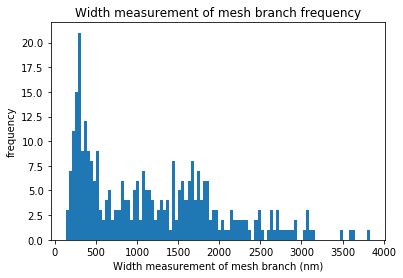

In [27]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1)
bins = plt.hist(np.array(total_widths),bins=100)
ax.set_xlabel("Width measurement of mesh branch (nm)")
ax.set_ylabel("frequency")
ax.set_title("Width measurement of mesh branch frequency")
plt.show()

In [28]:
sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes,
                          other_meshes_colors="random",
                          other_skeletons=total_branch_skeletons,
                          other_skeletons_colors="random",
                          #html_path="two_soma_mesh_skeleton_decomp.html"
                          )

In [36]:
np.argmax([1,4,5,6])

3

In [35]:

sk.graph_skeleton_and_mesh(other_meshes=[total_branch_meshes[47]],
                          other_meshes_colors="random",
                          other_skeletons=[total_branch_skeletons[47]],
                          other_skeletons_colors="random",
                          html_path="two_soma_mesh_skeleton_decomp.html")

# PART 3: LAST PART OF ANALYSIS WHERE MAKES CONCEPT GRAPHS

In [165]:
import neuron
neuron = reload(neuron)
nu = reload(nu)
sk = reload(sk)

#getting mesh and skeleton dictionaries
limb_idx_to_branch_meshes_dict = dict()
limb_idx_to_branch_skeletons_dict = dict()
for k in limb_correspondence.keys():
    limb_idx_to_branch_meshes_dict[k] = [limb_correspondence[k][j]["branch_mesh"] for j in limb_correspondence[k].keys()]
    limb_idx_to_branch_skeletons_dict[k] = [limb_correspondence[k][j]["branch_skeleton"] for j in limb_correspondence[k].keys()]      

#getting the soma dictionaries
soma_idx_to_mesh_dict = dict()
for k,v in enumerate(current_mesh_data[0]["soma_meshes"]):
    soma_idx_to_mesh_dict[k] = v

soma_idx_connectivity = current_mesh_data[0]["soma_to_piece_connectivity"]




limb_concept_networkx,limb_labels = neuron.generate_limb_concept_networks_from_global_connectivity(
    limb_idx_to_branch_meshes_dict = limb_idx_to_branch_meshes_dict,
    limb_idx_to_branch_skeletons_dict = limb_idx_to_branch_skeletons_dict,
    soma_idx_to_mesh_dict = soma_idx_to_mesh_dict,
    soma_idx_connectivity = soma_idx_connectivity,
    current_neuron=current_neuron,
    return_limb_labels=True
    )

#Before go and get concept maps:
print("Sizes of dictionaries sent")
for curr_limb in limb_idx_to_branch_skeletons_dict.keys():
    print((len(limb_idx_to_branch_skeletons_dict[curr_limb]),len(limb_idx_to_branch_meshes_dict[curr_limb])))
    
    
print("\n\n Sizes of concept maps gotten back")
for curr_idx in limb_concept_networkx.keys():
    for soma_idx,concept_graph in limb_concept_networkx[curr_idx].items():
        print(len(np.unique(list(concept_graph.nodes()))))



------Working on limb 0 -------
inside loop len(curr_limb_divided_meshes) = 79 len(curr_limb_divided_skeletons) = 79
--- Working on soma_idx: 0----
**More than one touching point to soma, touching_pieces = {touching_pieces}**
winning_piece_idx = 0
Winning touching piece = [47]
inside inner loop len(curr_limb_divided_skeletons) = 79
closest_endpoint = [754813.4 950379.  873075.7]
At the start, starting_node = [49]
edge_endpoints_to_process was empty so exiting loop after 79 iterations
starting_node = [49]
Total time for branches to concept conversion = 0.3423020839691162

After concept mapping size = 79
Local time for concept mapping = 12.613781929016113


------Working on limb 1 -------
inside loop len(curr_limb_divided_meshes) = 47 len(curr_limb_divided_skeletons) = 47
Merge limb detected
--- Working on soma_idx: 0----
inside inner loop len(curr_limb_divided_skeletons) = 47
closest_endpoint = [764236.7 961432.5 877960.4]
At the start, starting_node = [12]
edge_endpoints_to_process w

# the final data that will be ported over to the Neuron class

In [166]:

current_neuron
"""
whole neuron to be used for other processing
"""

# The 0 at the front is to say it is the first seperated mesh containing somas (could be multiple)
current_mesh_data[0].keys()
"""
soma_meshes
soma_to_piece_connectivity
"""
"""
limb_correspondence[0][0].keys() --> the exact limb and the exact branch

AKA [limb_idx][branch_idx]

"""
limb_correspondence[0][0]["branch_skeleton"]
limb_correspondence[0][0]["width_from_skeleton"]
limb_correspondence[0][0]["branch_mesh"]
limb_correspondence[0][0]["branch_face_idx"]



limb_concept_networkx
limb_labels
"""
Concept networks for limbs and labels of all limbs
"""

'\nConcept networks for limbs and labels of all limbs\n'

# Plotting for visualizataions (used for platinum update report)

In [167]:
curr_limb_idx = 2

In [168]:
#plotting the mesh
sk = reload(sk)
mu = reload(mu)
random_colors_used = sk.graph_skeleton_and_mesh(
    other_meshes=[v["branch_mesh"] for k,v in limb_correspondence[curr_limb_idx].items() ],
                          other_meshes_colors="random",
                          other_skeletons=[v["branch_skeleton"] for k,v in limb_correspondence[curr_limb_idx].items() ],
                          other_skeletons_colors="random",
                            mesh_alpha=0.8,
                          return_other_colors=True)
random_colors_used_no_alpha = random_colors_used[:,:-1]

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [169]:
#plotting the skeleton
sk = reload(sk)
mu = reload(mu)
sk.graph_skeleton_and_mesh(#other_meshes=total_branch_meshes[:node_to_check_to],
                          #other_meshes_colors="random",
                          other_skeletons=[v["branch_skeleton"] for k,v in limb_correspondence[curr_limb_idx].items() ],
                          other_skeletons_colors="random",
                            mesh_alpha=0.05)


In [170]:
# get the label:
limb_labels[curr_limb_idx]

'Normal'

In [171]:
limb_concept_networkx

{0: {0: <networkx_utils.GraphOrderedEdges at 0x7fd03a358198>},
 1: {0: <networkx_utils.GraphOrderedEdges at 0x7fd03a358630>,
  1: <networkx_utils.GraphOrderedEdges at 0x7fd0404fd550>},
 2: {0: <networkx_utils.GraphOrderedEdges at 0x7fd03a358898>},
 3: {0: <networkx_utils.GraphOrderedEdges at 0x7fd03a360908>},
 4: {1: <networkx_utils.GraphOrderedEdges at 0x7fd043254a20>},
 5: {0: <networkx_utils.GraphOrderedEdges at 0x7fd041bef668>},
 6: {1: <networkx_utils.GraphOrderedEdges at 0x7fd041efdd30>},
 7: {1: <networkx_utils.GraphOrderedEdges at 0x7fd03a360128>},
 8: {1: <networkx_utils.GraphOrderedEdges at 0x7fd041d9c5c0>},
 9: {1: <networkx_utils.GraphOrderedEdges at 0x7fd0405b5a20>},
 10: {0: <networkx_utils.GraphOrderedEdges at 0x7fd03b28e128>}}

In [172]:
for soma_idx,concept_graph in limb_concept_networkx[curr_limb_idx].items():
    print((len(np.unique(list(concept_graph.nodes()))),len([v["branch_mesh"] for k,v in limb_correspondence[curr_limb_idx].items() ])))

(51, 51)


Starting from soma index 0 with starting_coordinate and mesh: [[758775.4 962635.3 865865.4]]


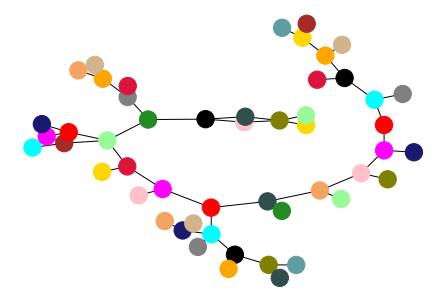

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
for soma_idx,concept_graph in limb_concept_networkx[curr_limb_idx].items():
    print(f"Starting from soma index {soma_idx} with starting_coordinate and mesh: "
          f"{xu.get_node_attributes(concept_graph,attribute_name='starting_coordinate')}")
    # plotting the concept network with the same colors
    nx.draw(concept_graph,node_color=random_colors_used_no_alpha) 
    plt.show()
    print("\n\n")

In [175]:
# Try plotting the points in 3D: random_colors_used = sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:node_to_check_to],
mesh_midpoints =  [np.array([np.mean(k.vertices,axis=0)]) for k in [v["branch_mesh"] for k,v in limb_correspondence[curr_limb_idx].items() ]]
for soma_idx,concept_graph in limb_concept_networkx[curr_limb_idx].items():
    graph_nodes_skeleton = np.array(mesh_midpoints)[concept_graph.edges_ordered()].reshape(-1,2,3)
    [k for k in graph_nodes_skeleton]
    random_colors_used[:,-1] = 1


    sk.graph_skeleton_and_mesh(other_scatter=mesh_midpoints,
                              other_scatter_colors=random_colors_used,
                              other_skeletons=graph_nodes_skeleton,
                              other_skeletons_colors="black",
                                                   scatter_size=3)



In [177]:


    
# Try plotting the points in 3D: random_colors_used = sk.graph_skeleton_and_mesh(other_meshes=total_branch_meshes[:node_to_check_to],
mesh_midpoints =  [np.array([np.mean(k.vertices,axis=0)]) for k in [v["branch_mesh"] for k,v in limb_correspondence[curr_limb_idx].items() ]]
for soma_idx,concept_graph in limb_concept_networkx[curr_limb_idx].items():
    graph_nodes_skeleton = np.array(mesh_midpoints)[concept_graph.edges_ordered()].reshape(-1,2,3)
    [k for k in graph_nodes_skeleton]
    random_colors_used[:,-1] = 1


    sk.graph_skeleton_and_mesh(
        other_meshes=[v["branch_mesh"] for k,v in limb_correspondence[curr_limb_idx].items() ],
                          other_meshes_colors="random",other_scatter=mesh_midpoints,
                              other_scatter_colors=random_colors_used,
                              other_skeletons=graph_nodes_skeleton,
                              other_skeletons_colors="black",
                                                   scatter_size=1)